In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/full-players-dataset/generalStats_pos - Team mapping.csv
/kaggle/input/full-players-dataset/generalStats_pos - goalkeepingStats_pos.csv
/kaggle/input/full-players-dataset/generalStats_pos - Nationality mapping.csv
/kaggle/input/full-players-dataset/generalStats_pos - League mapping.csv
/kaggle/input/full-players-dataset/generalStats_pos - generalStats_pos.csv
/kaggle/input/full-players-dataset/generalStats_pos - Position mapping.csv


Install Libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Load Dataset

In [3]:
generalStats_pos = pd.read_csv('/kaggle/input/full-players-dataset/generalStats_pos - generalStats_pos.csv')

Data cleaning

         #                   id            Player  age  Nation_map  DF  FW  \
0      179    erling_haaland_23    Erling Haaland   23           7   0   1   
1     1185   vinicius_junior_23   Vinicius Júnior   23          12   0   1   
2      373       bukayo_saka_21       Bukayo Saka   21           3   0   1   
3      800    victor_osimhen_24    Victor Osimhen   24          17   0   1   
4      144        phil_foden_23        Phil Foden   23           3   0   1   
...    ...                  ...               ...  ...         ...  ..  ..   
1310  1407       oscar_urena_20       Oscar Ureña   20          10   0   0   
1311   793  marios_oikonomou_30  Marios Oikonomou   30          58   1   0   
1314   574    daniel_ciofani_38    Daniel Ciofani   38          42   0   1   
1315   753      luca_marrone_33      Luca Marrone   33          42   1   0   
1316   998     ricard_artero_20     Ricard Artero   20          10   0   1   

      MF  Position_map  Team_map  ...  Dist   FK    xG    SCA  

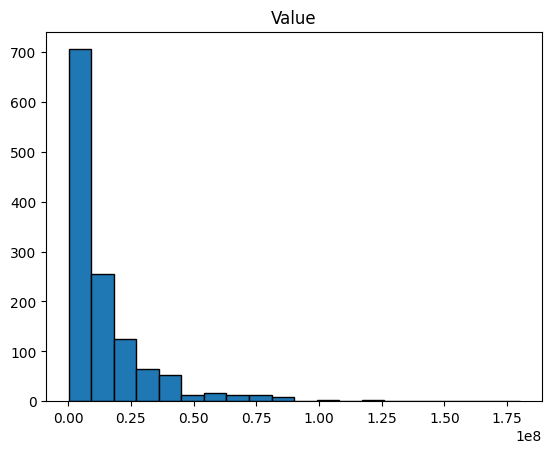

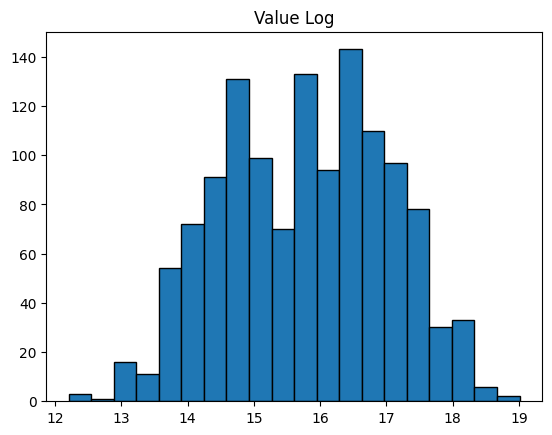

In [4]:
generalStats_pos['value_log'] = generalStats_pos['value'].apply(lambda x: math.log(x))
generalStats_pos = generalStats_pos.dropna()
print(generalStats_pos)
sorted_data = np.sort(generalStats_pos['value'])
plt.hist(sorted_data, edgecolor='black', bins=20)
plt.title('Value')
plt.show()

sorted_data = np.sort(generalStats_pos['value_log'])
plt.hist(sorted_data, edgecolor='black', bins=20)
plt.title('Value Log')
plt.show()

Exploratory analysis

                #   id  Player  age  Nation_map   DF   FW   MF  Team_map  \
Position_map                                                               
1             194  194     194  194         194  194  194  194       194   
2             282  282     282  282         282  282  282  282       282   
3             454  454     454  454         454  454  454  454       454   
4             255  255     255  255         255  255  255  255       255   
5              73   73      73   73          73   73   73   73        73   
6              16   16      16   16          16   16   16   16        16   

              Leag_map  ...  Dist   FK   xG  SCA  SCA90  PassLive  Sh_Sh  GCA  \
Position_map            ...                                                     
1                  194  ...   194  194  194  194    194       194    194  194   
2                  282  ...   282  282  282  282    282       282    282  282   
3                  454  ...   454  454  454  454    454       454  

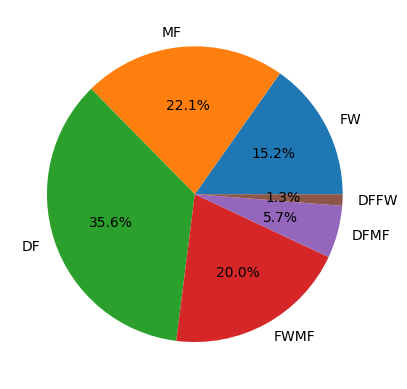

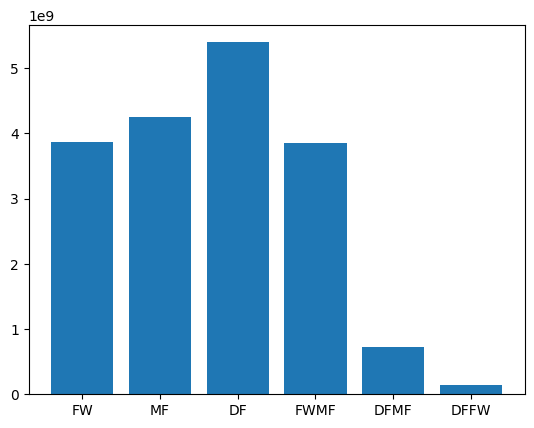

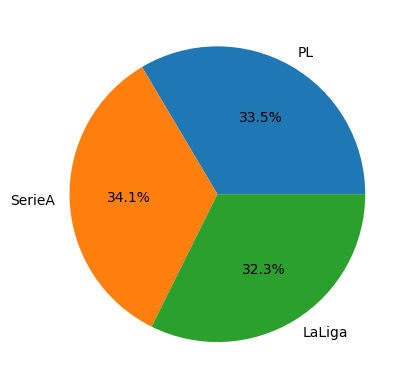

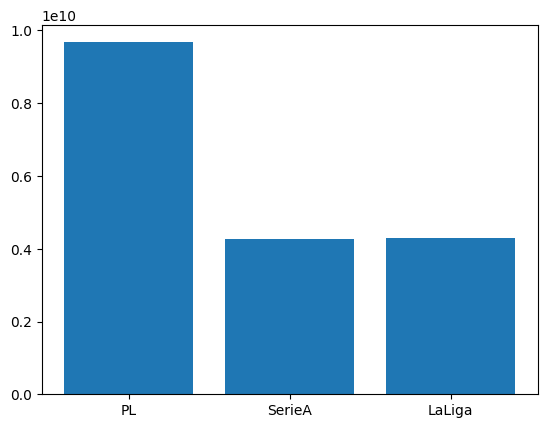

-----------------------------------------------------------------------
Descriptive statistics
Mean: 14305337.519623233
Median: 8000000.0
Mode: 2000000
Variance: 338809551573678.6
Standard Deviation: 18406780.043605633
Minimum Value: 200000.0
Maximum Value: 180000000.0
Range: 179800000.0
---------------------------------------------------------------------------
5 most expensive players
            Player  age  Nation_map  Position_map  Leag_map        value
0   Erling Haaland   23           7             1         1  180000000.0
1  Vinicius Júnior   23          12             1         3  150000000.0
2      Bukayo Saka   21           3             1         1  120000000.0
3   Victor Osimhen   24          17             1         2  120000000.0
4       Phil Foden   23           3             1         1  110000000.0
-----------------------------------------------------------------------
5 least expensive players
                    Player  age  Nation_map  Position_map  Leag_map     va

In [5]:
grouped_generalStats_pos = generalStats_pos.groupby(by='Position_map').count()
mylabels = ['FW','MF','DF','FWMF','DFMF','DFFW']
print(grouped_generalStats_pos)
plt.pie(grouped_generalStats_pos['value'],autopct='%1.1f%%', labels = mylabels)
plt.show()
grouped_generalStats_pos = generalStats_pos.groupby(by='Position_map').sum()
grouped_generalStats_pos['labels']=mylabels
plt.bar(grouped_generalStats_pos['labels'],grouped_generalStats_pos['value'])
plt.show()


grouped_generalStats_pos = generalStats_pos.groupby(by='Leag_map').count()
mylabels = ['PL','SerieA','LaLiga']
plt.pie(grouped_generalStats_pos['value'],autopct='%1.1f%%', labels = mylabels)
plt.show()
grouped_generalStats_pos = generalStats_pos.groupby(by='Leag_map').sum()
grouped_generalStats_pos['labels']=mylabels
plt.bar(grouped_generalStats_pos['labels'],grouped_generalStats_pos['value'])
plt.show()


data = generalStats_pos['value']
mean = np.mean(data)
median = np.median(data)
mode = np.argmax(np.bincount(data))
variance = np.var(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = max_value - min_value

print('-----------------------------------------------------------------------')
print('Descriptive statistics')
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")

print('---------------------------------------------------------------------------')
print('5 most expensive players')
print(generalStats_pos[['Player','age','Nation_map','Position_map','Leag_map','value']].nlargest(n=5,columns = 'value'))
print('-----------------------------------------------------------------------')
print('5 least expensive players')
print(generalStats_pos[['Player','age','Nation_map','Position_map','Leag_map','value']].nsmallest(n=5,columns = 'value'))
print('---------------------------------------------------------------------------')


grouped_generalStats_pos = generalStats_pos.groupby(by='Team_map').sum()
n_teams = grouped_generalStats_pos['value'].nlargest(n=5)
print('5 Teams with the most expensive players')
print(n_teams)
print('---------------------------------------------------------------------------')
print('5 Teams with the least expensive players')
n_teams = grouped_generalStats_pos['value'].nsmallest(n=5)
print(n_teams)
print('---------------------------------------------------------------------------')


Vizualization of correlation between Categorical, Continous and Discrete variables and value

Correlation between categorical variables and Value of a football player

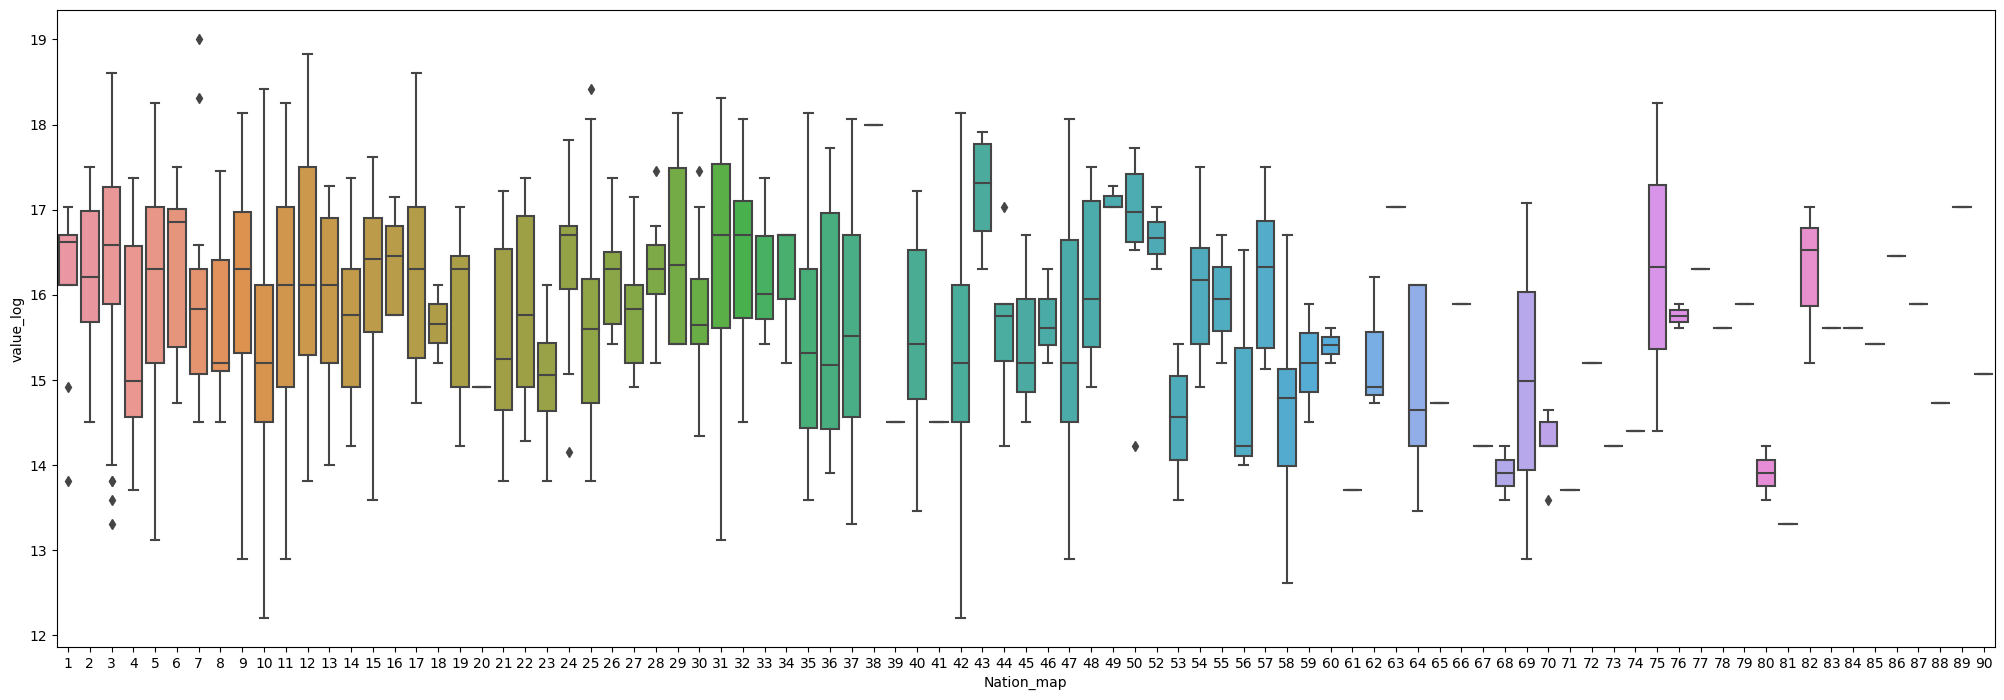

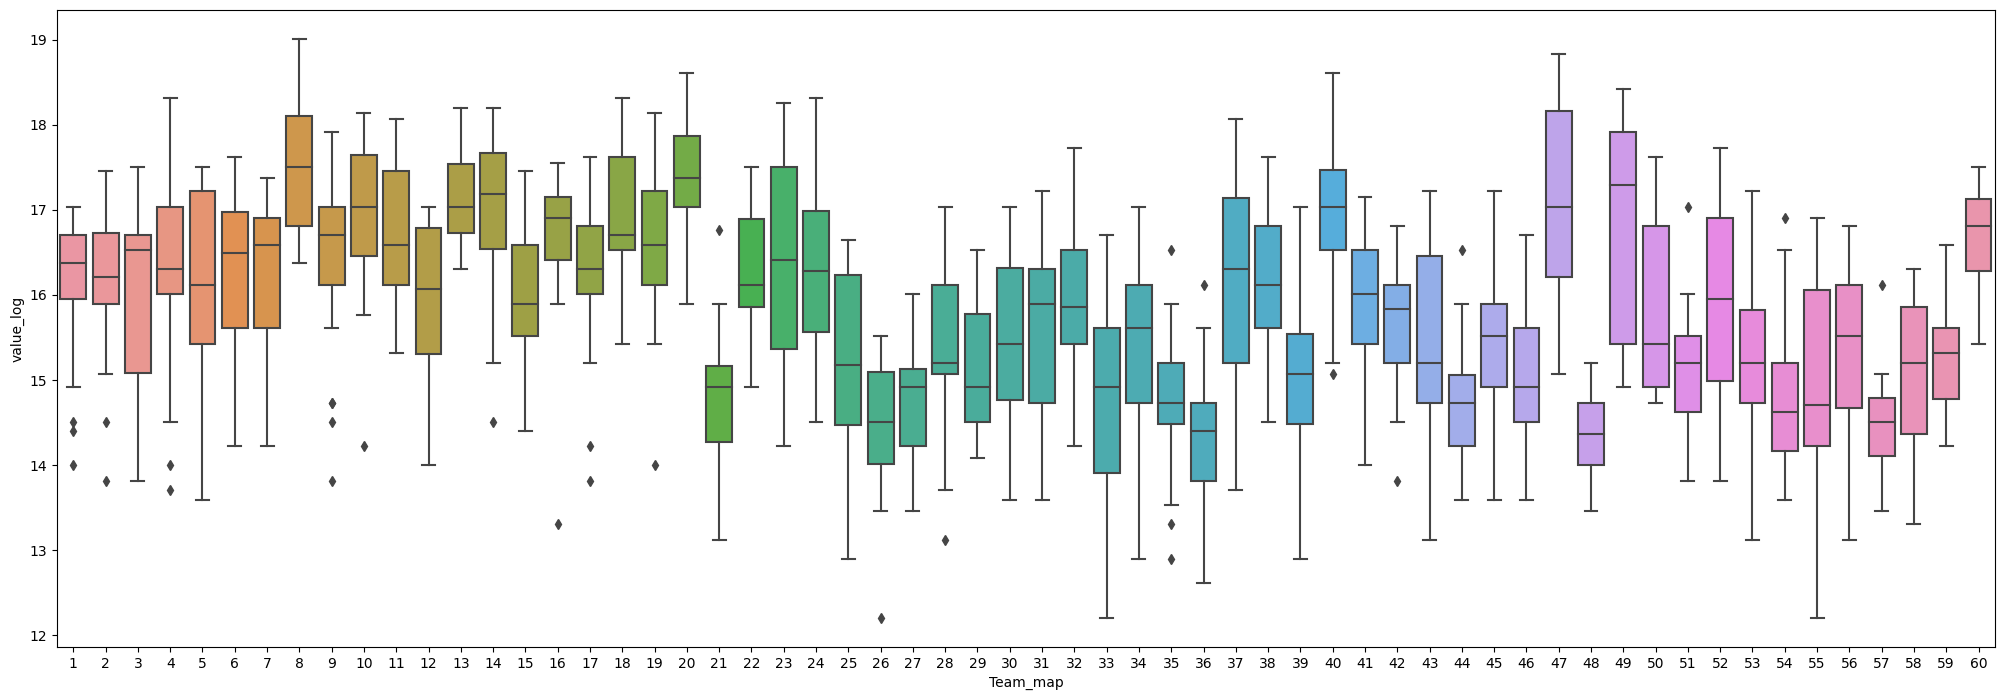

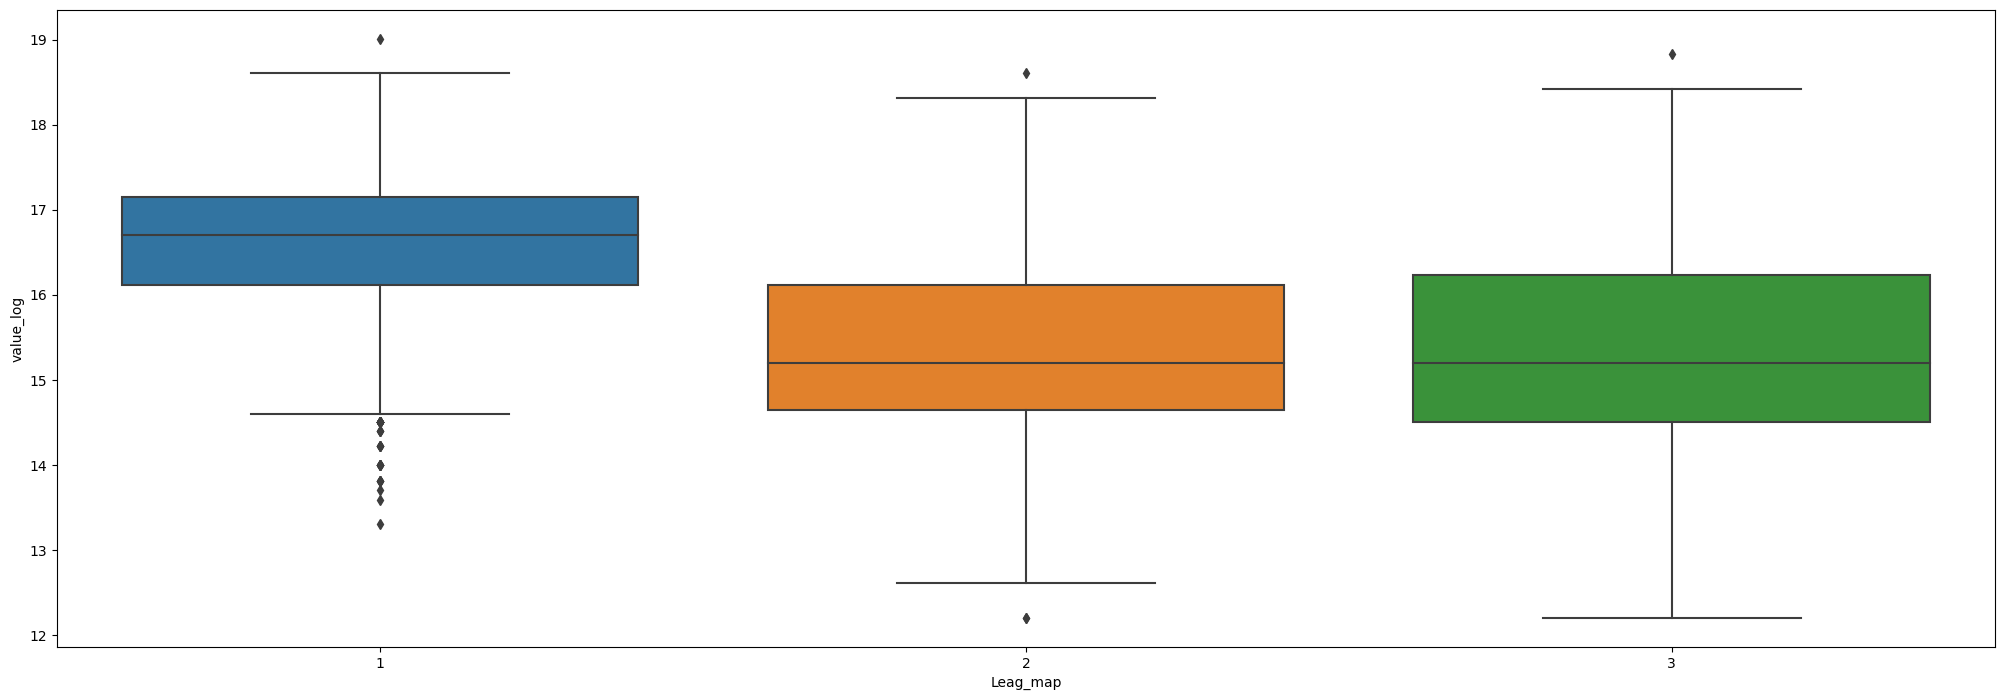

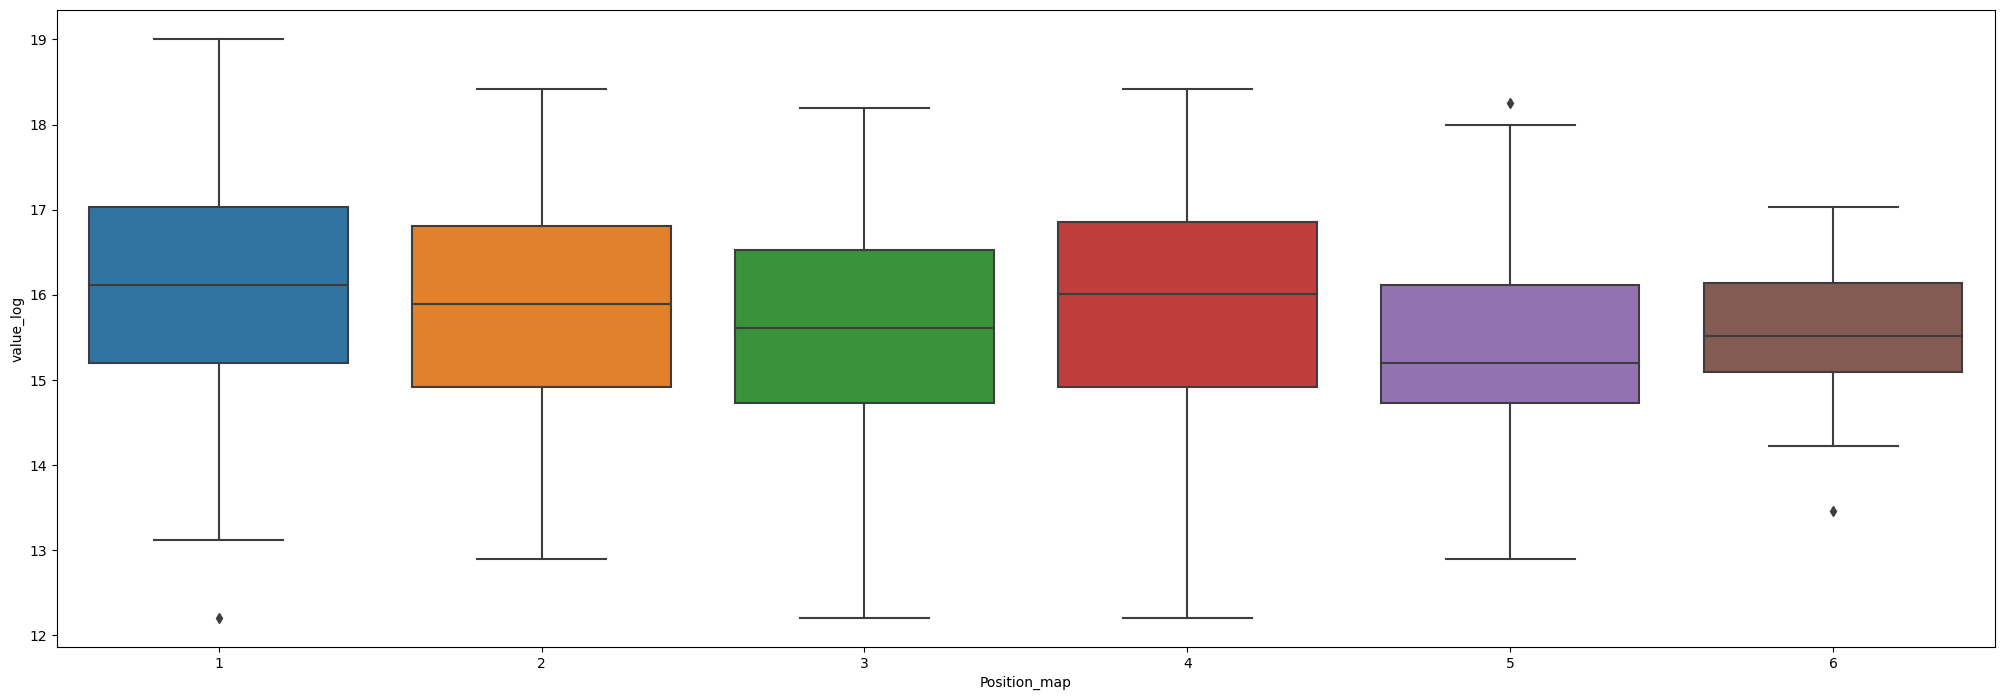

In [6]:
categorical_variables = ['Nation_map','Team_map','Leag_map','Position_map']

for variable in categorical_variables:
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 8.27)
    sns.boxplot(y= "value_log", x=variable, data = generalStats_pos,ax=ax)
    plt.show()


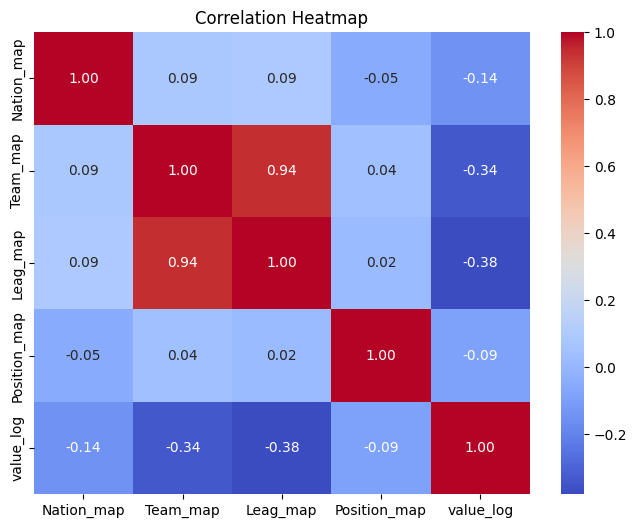

In [7]:
categorical_variables = ['Nation_map','Team_map','Leag_map','Position_map','value_log']
categorical_data_value = generalStats_pos[categorical_variables]
categorical_data_value_corr =categorical_data_value.corr("spearman")
plt.figure(figsize=(8, 6))
sns.heatmap(categorical_data_value_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

For categorical variables we used spearman rank test which is meant for calculating correlation between categorical and continous variable

Spearman's Rank Correlation Coefficient: -0.09344267511295422
P-value: 3.910417820870028e-05


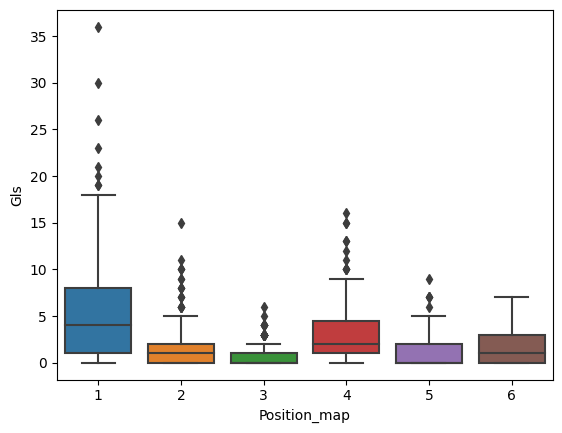

In [8]:
generalStats_pos = generalStats_pos.dropna()
correlation, p_value = stats.kendalltau(generalStats_pos['Gls'], generalStats_pos['Position_map'])
print(f"Spearman's Rank Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")
sns.boxplot(y= 'Gls', x='Position_map', data = generalStats_pos)
plt.show()

Correlation between discrete variables and Value of a football player

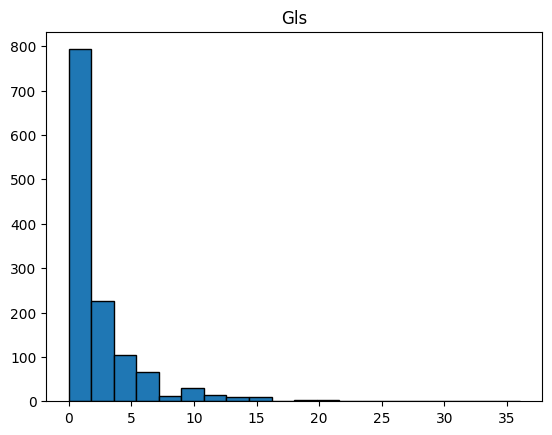

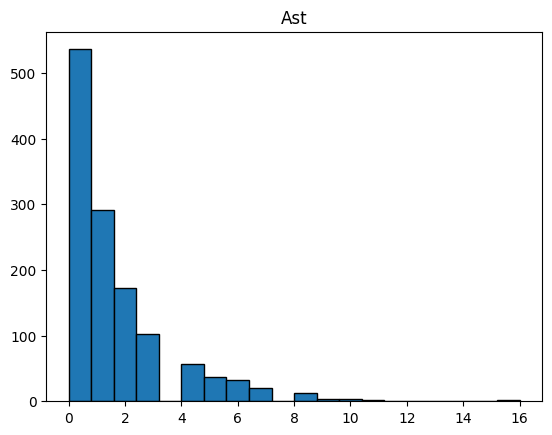

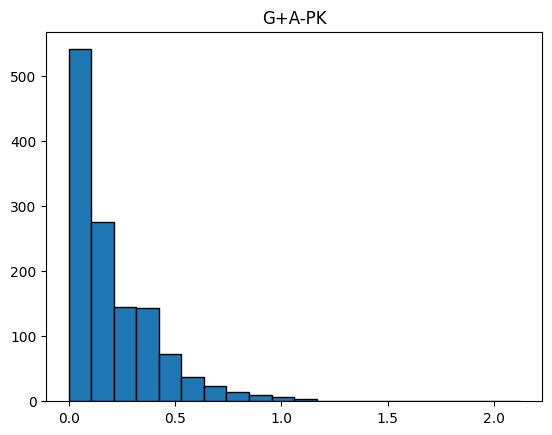

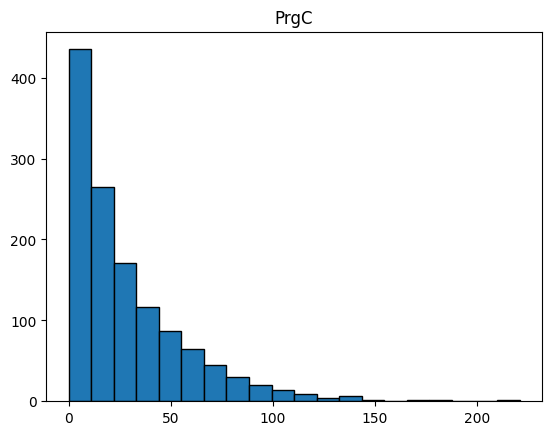

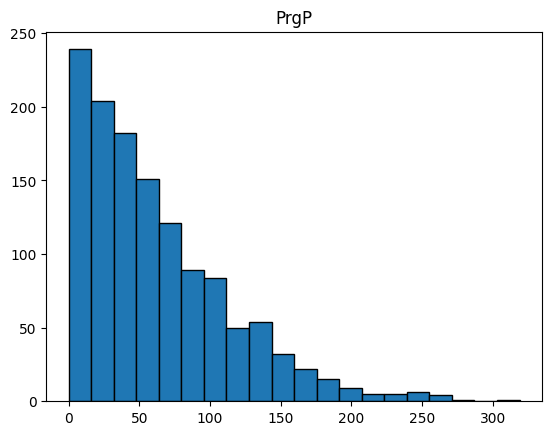

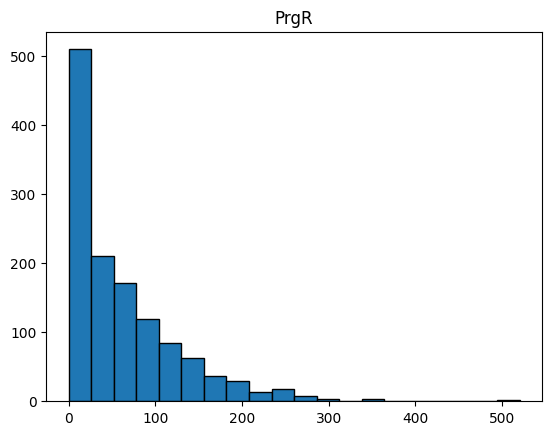

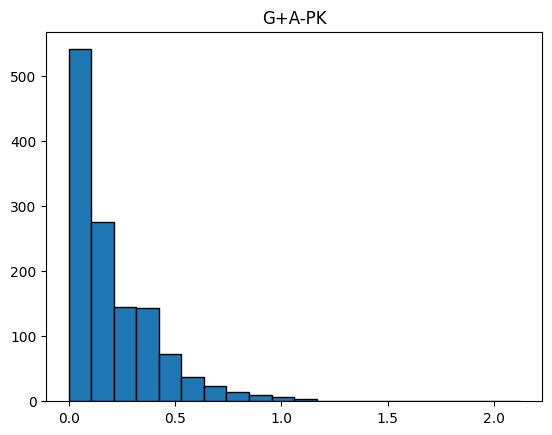

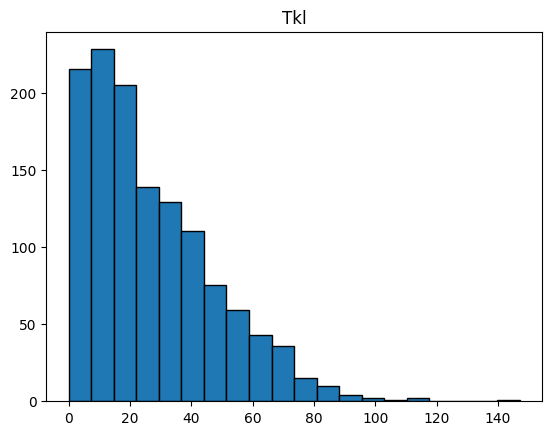

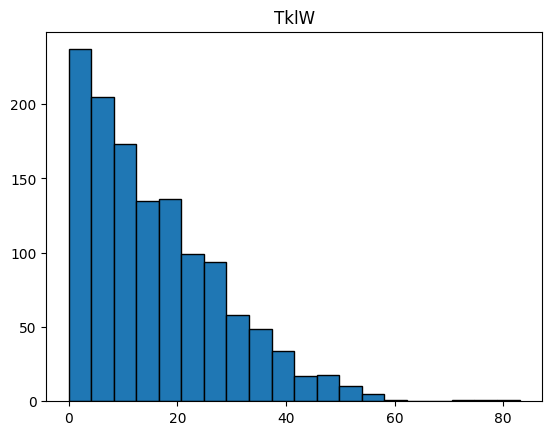

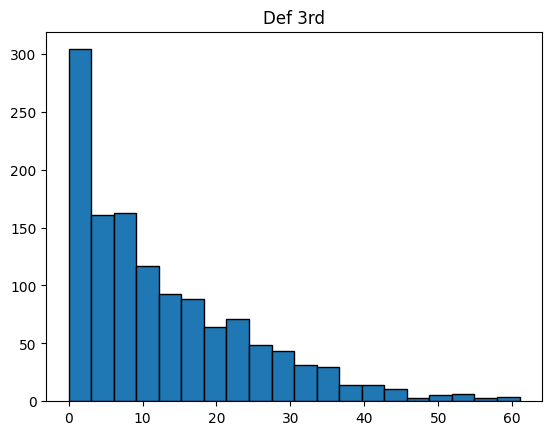

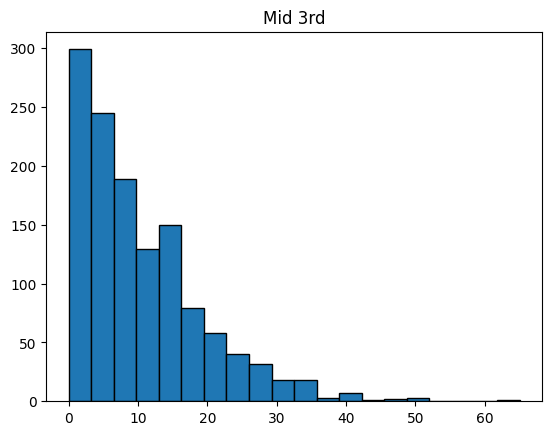

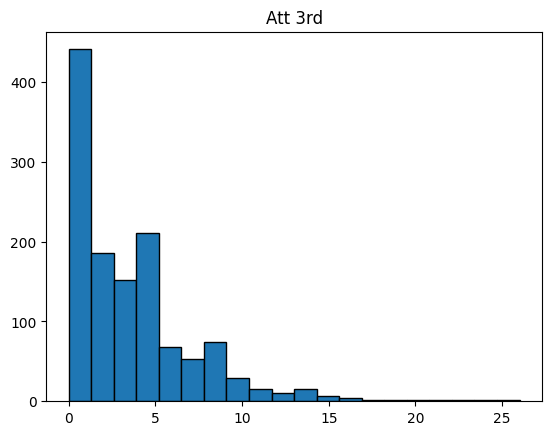

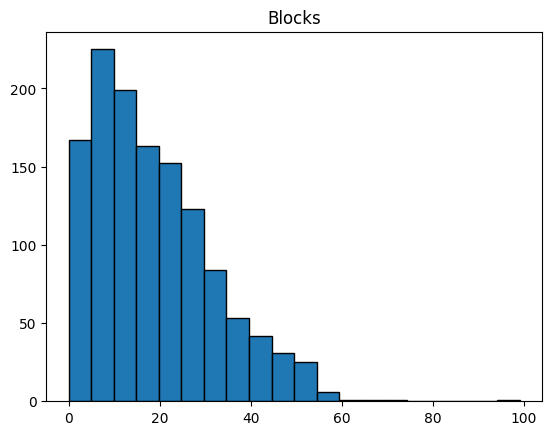

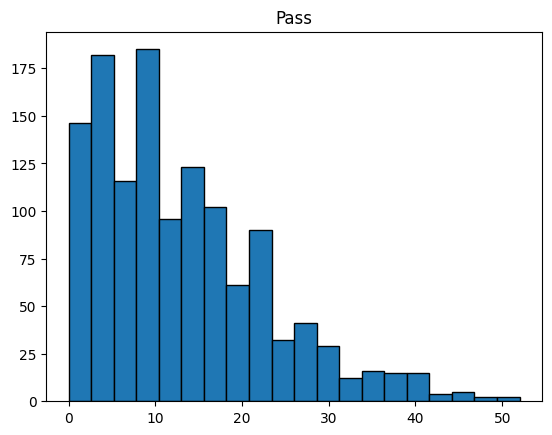

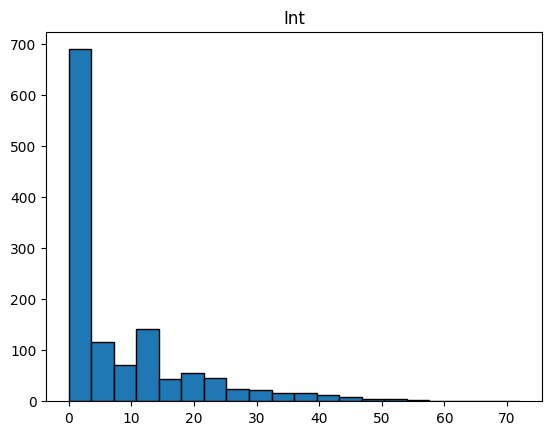

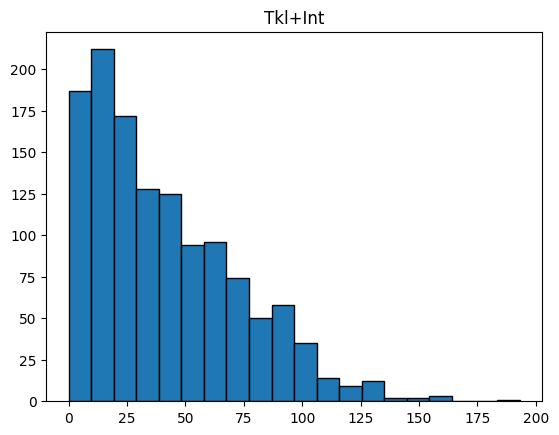

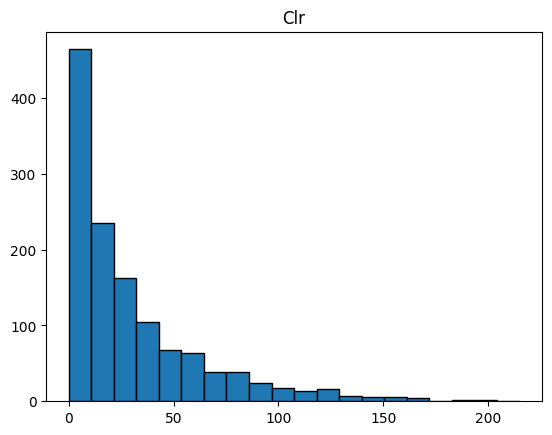

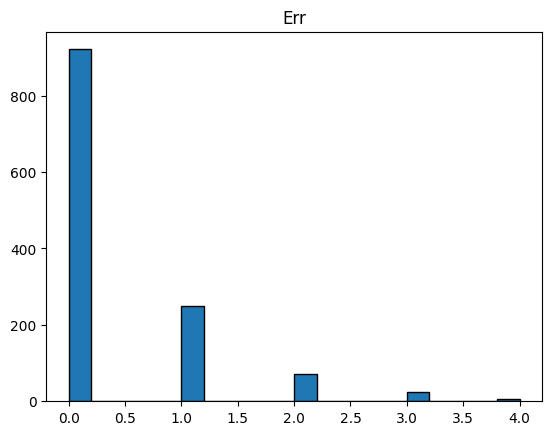

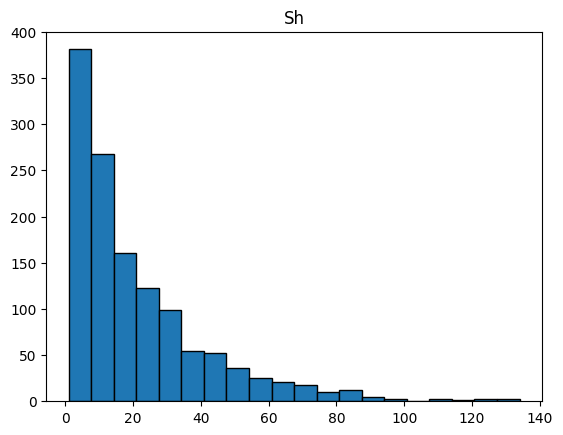

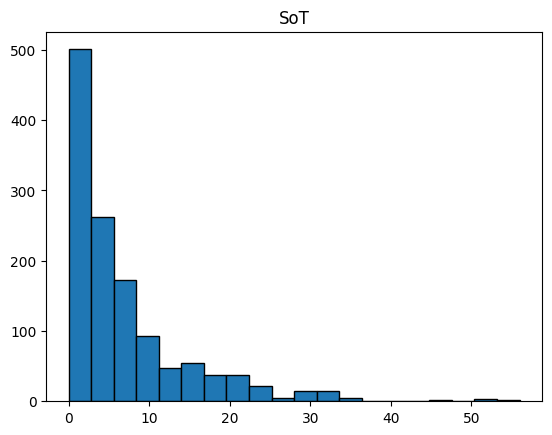

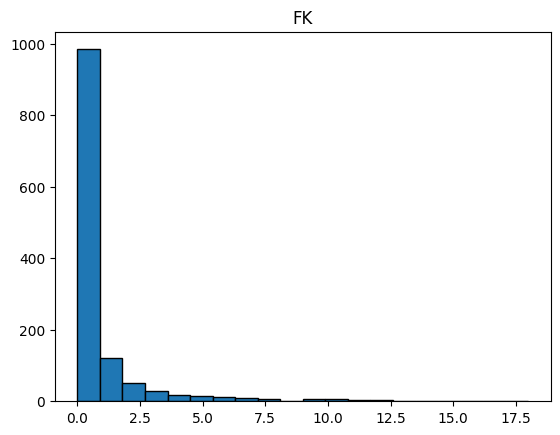

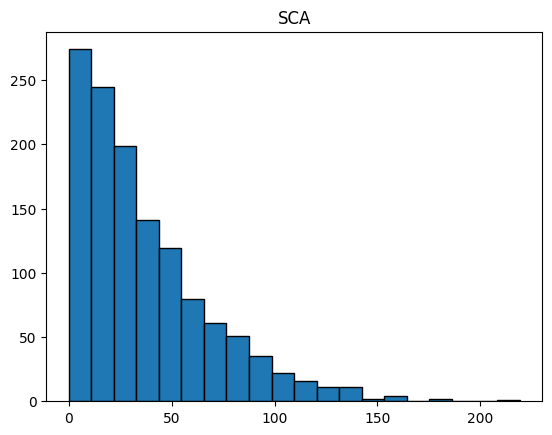

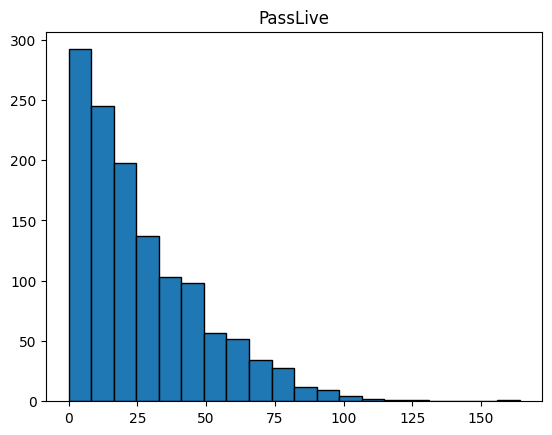

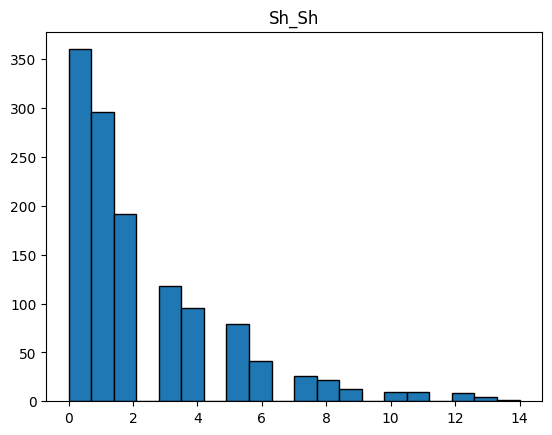

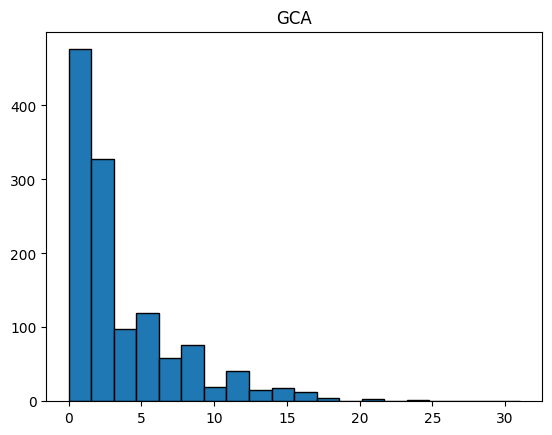

In [9]:
discrete_variables = ['Gls','Ast','G+A-PK','PrgC','PrgP','PrgR','G+A-PK','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Blocks','Pass','Int','Tkl+Int','Clr','Err','Sh','SoT','FK','SCA','PassLive','Sh_Sh','GCA']



for variable in discrete_variables:
    sorted_data = np.sort(generalStats_pos[variable])
    plt.hist(sorted_data, edgecolor='black', bins=20)
    plt.title(variable)
    plt.show()

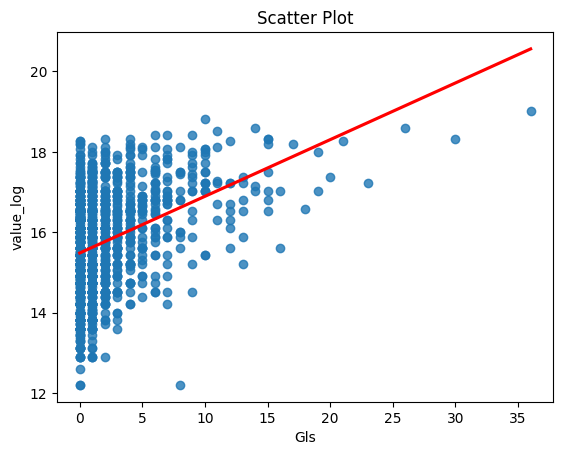

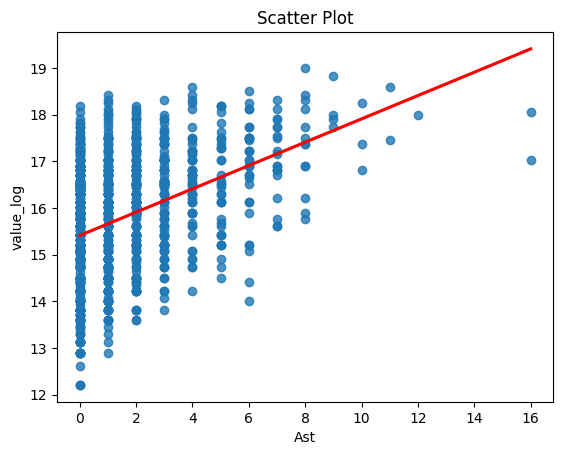

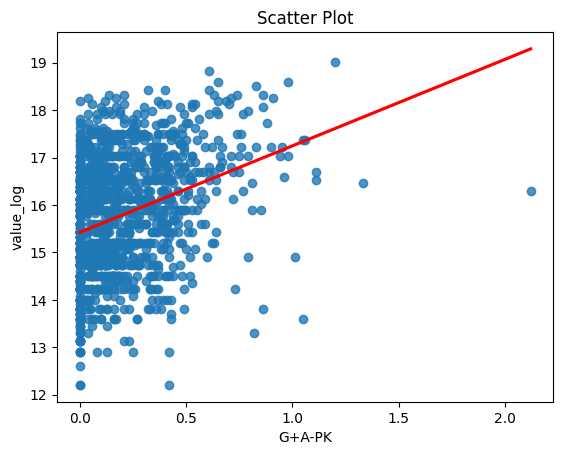

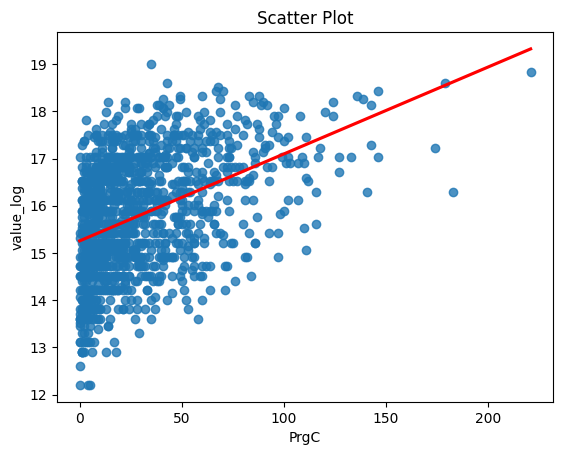

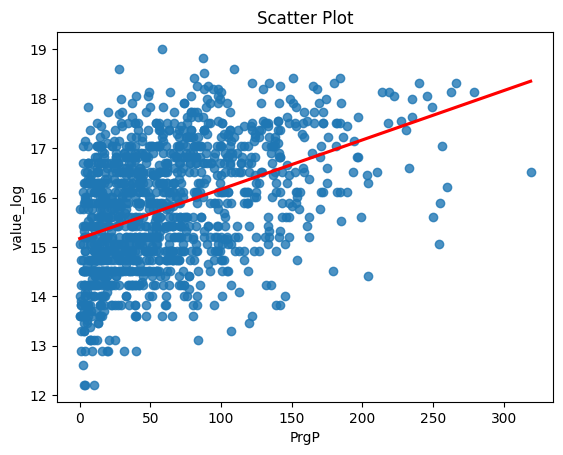

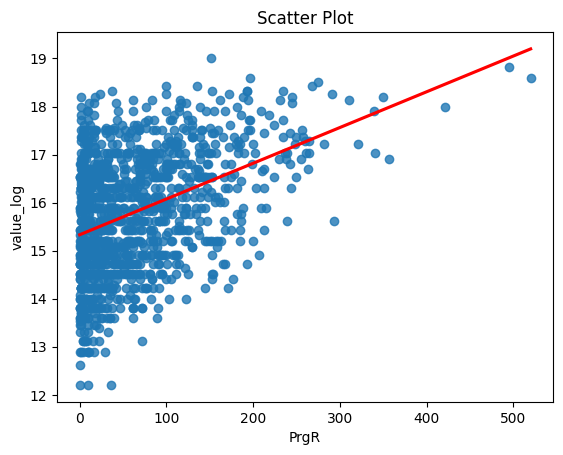

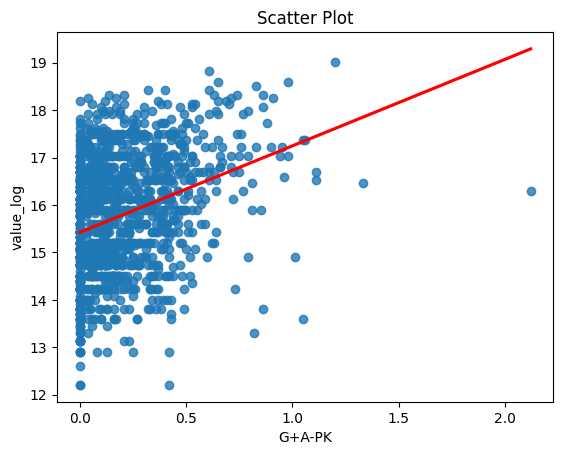

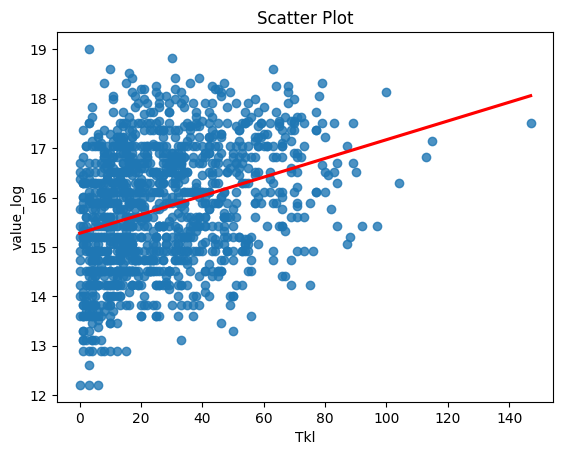

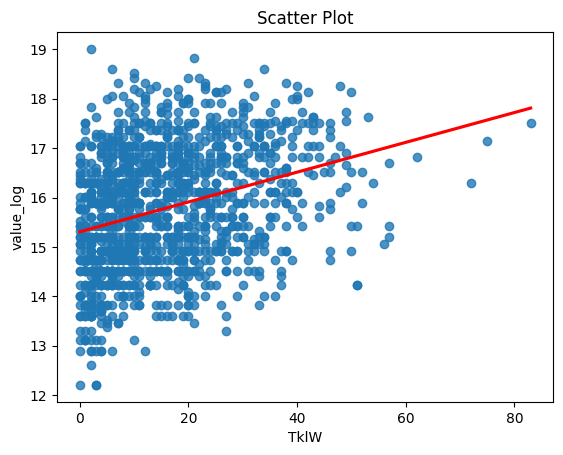

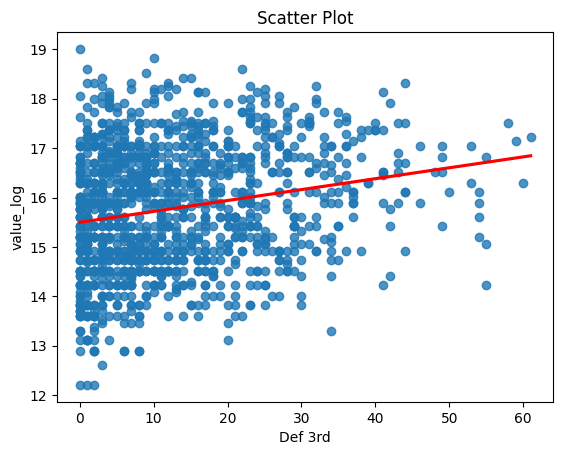

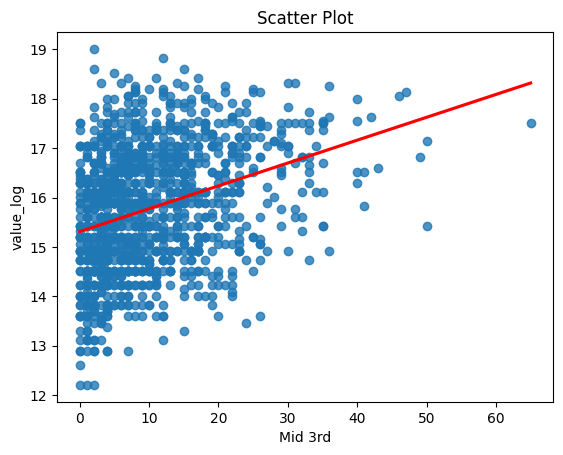

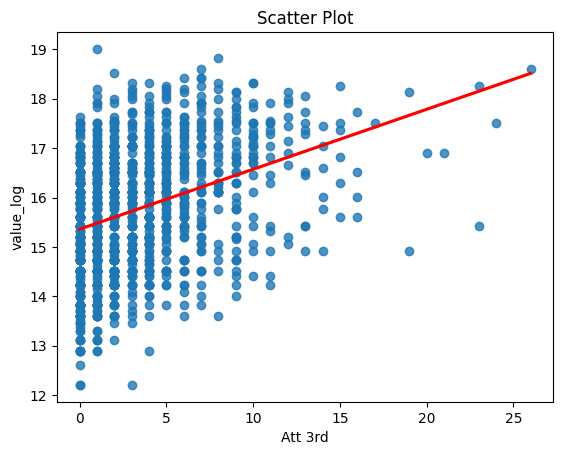

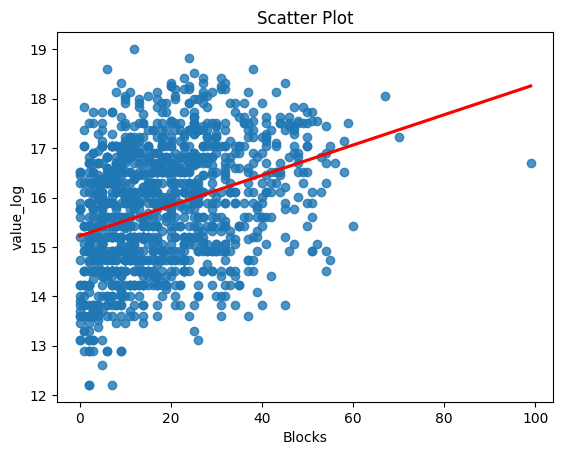

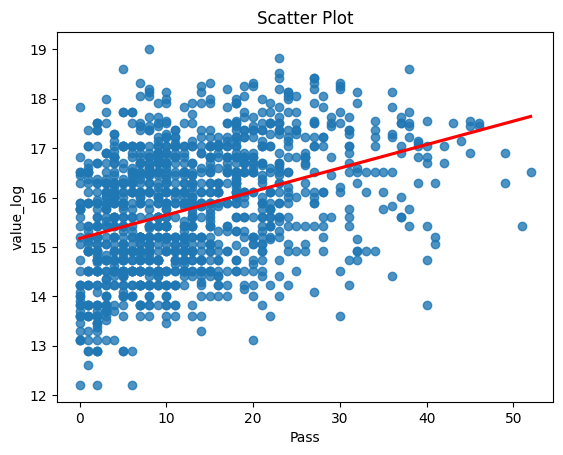

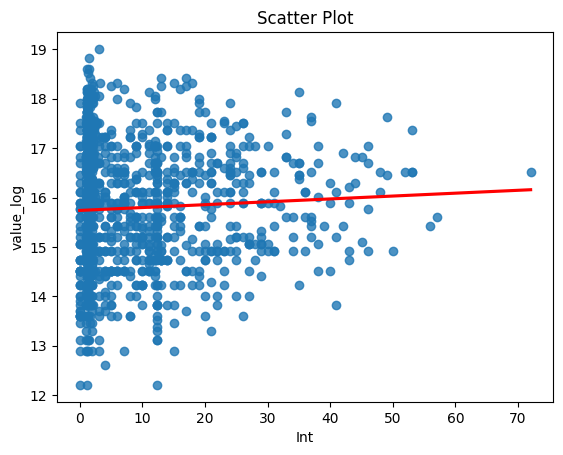

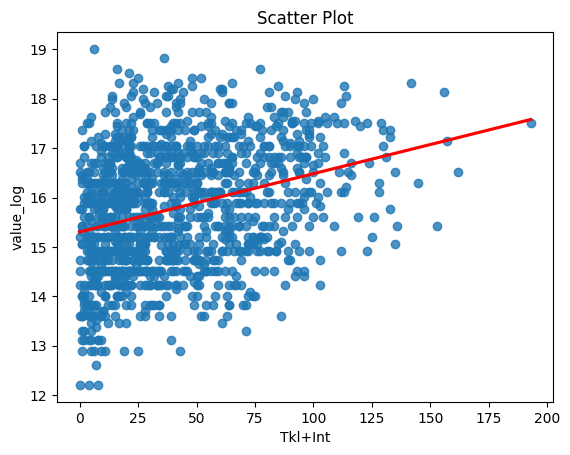

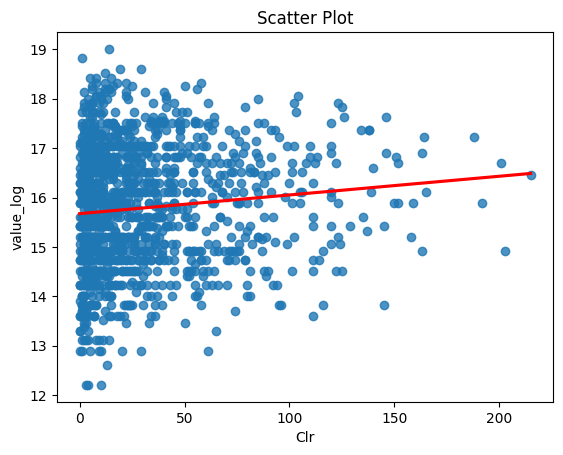

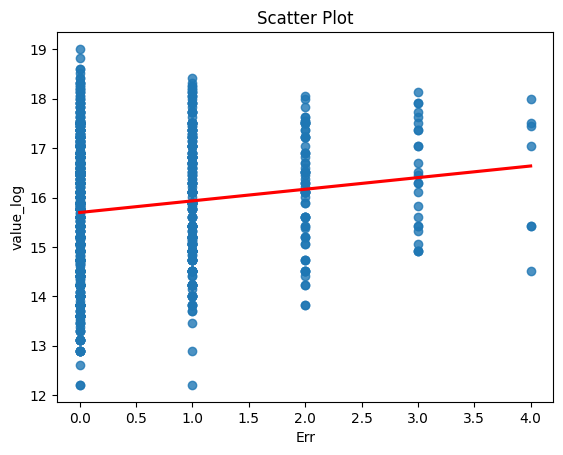

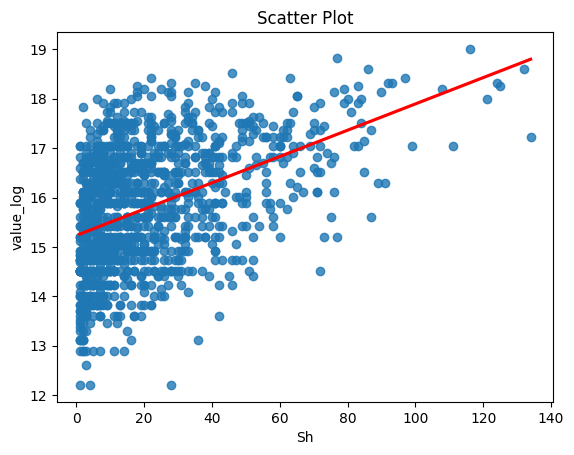

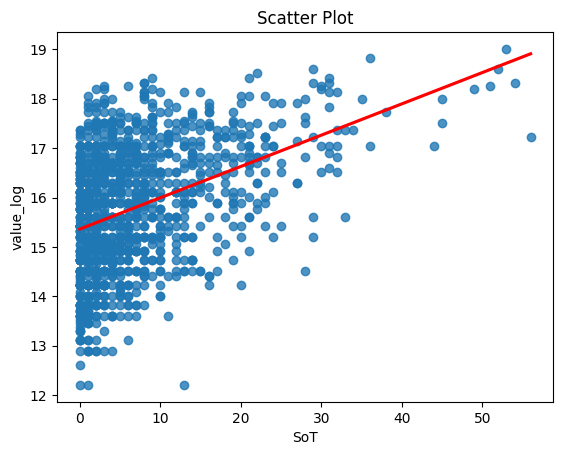

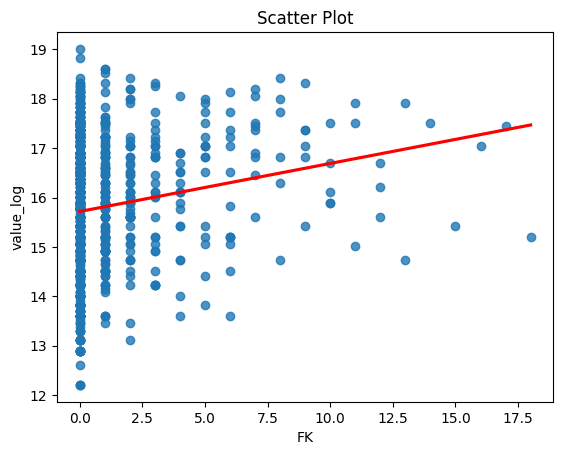

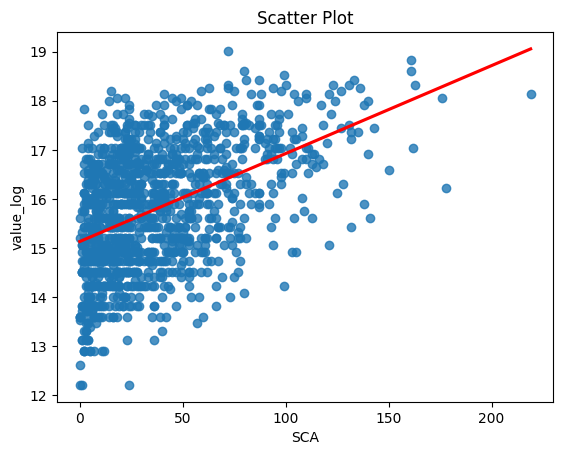

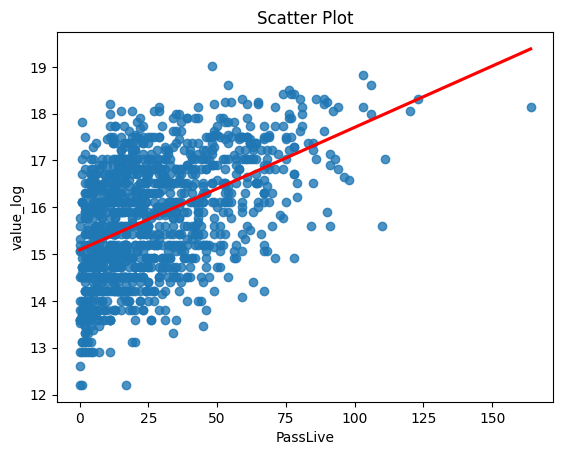

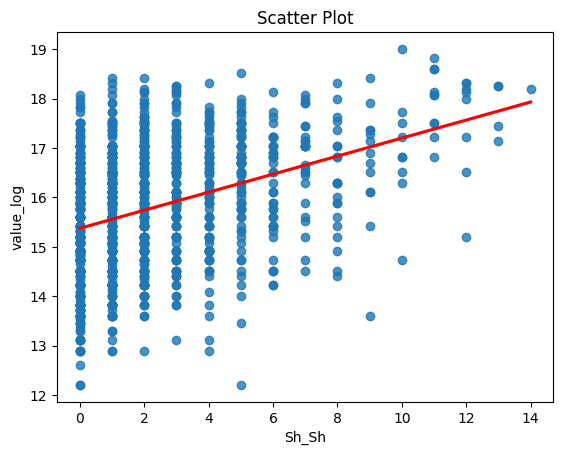

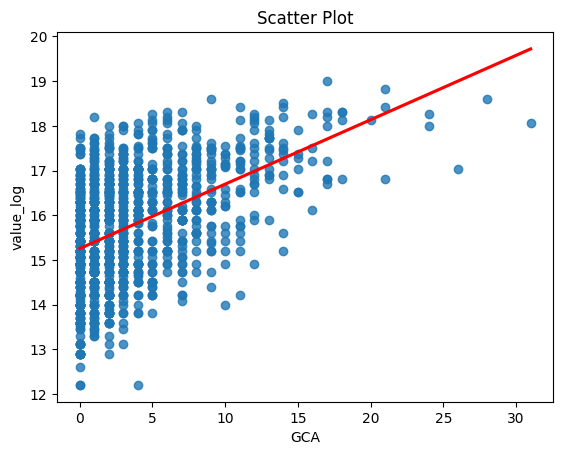

In [10]:
for variable in discrete_variables:
    sns.regplot(x=generalStats_pos[variable], y=generalStats_pos['value_log'], ci=None, line_kws={'color':'red'})
    plt.xlabel(variable)
    plt.ylabel('value_log')
    plt.title('Scatter Plot')
    plt.show()

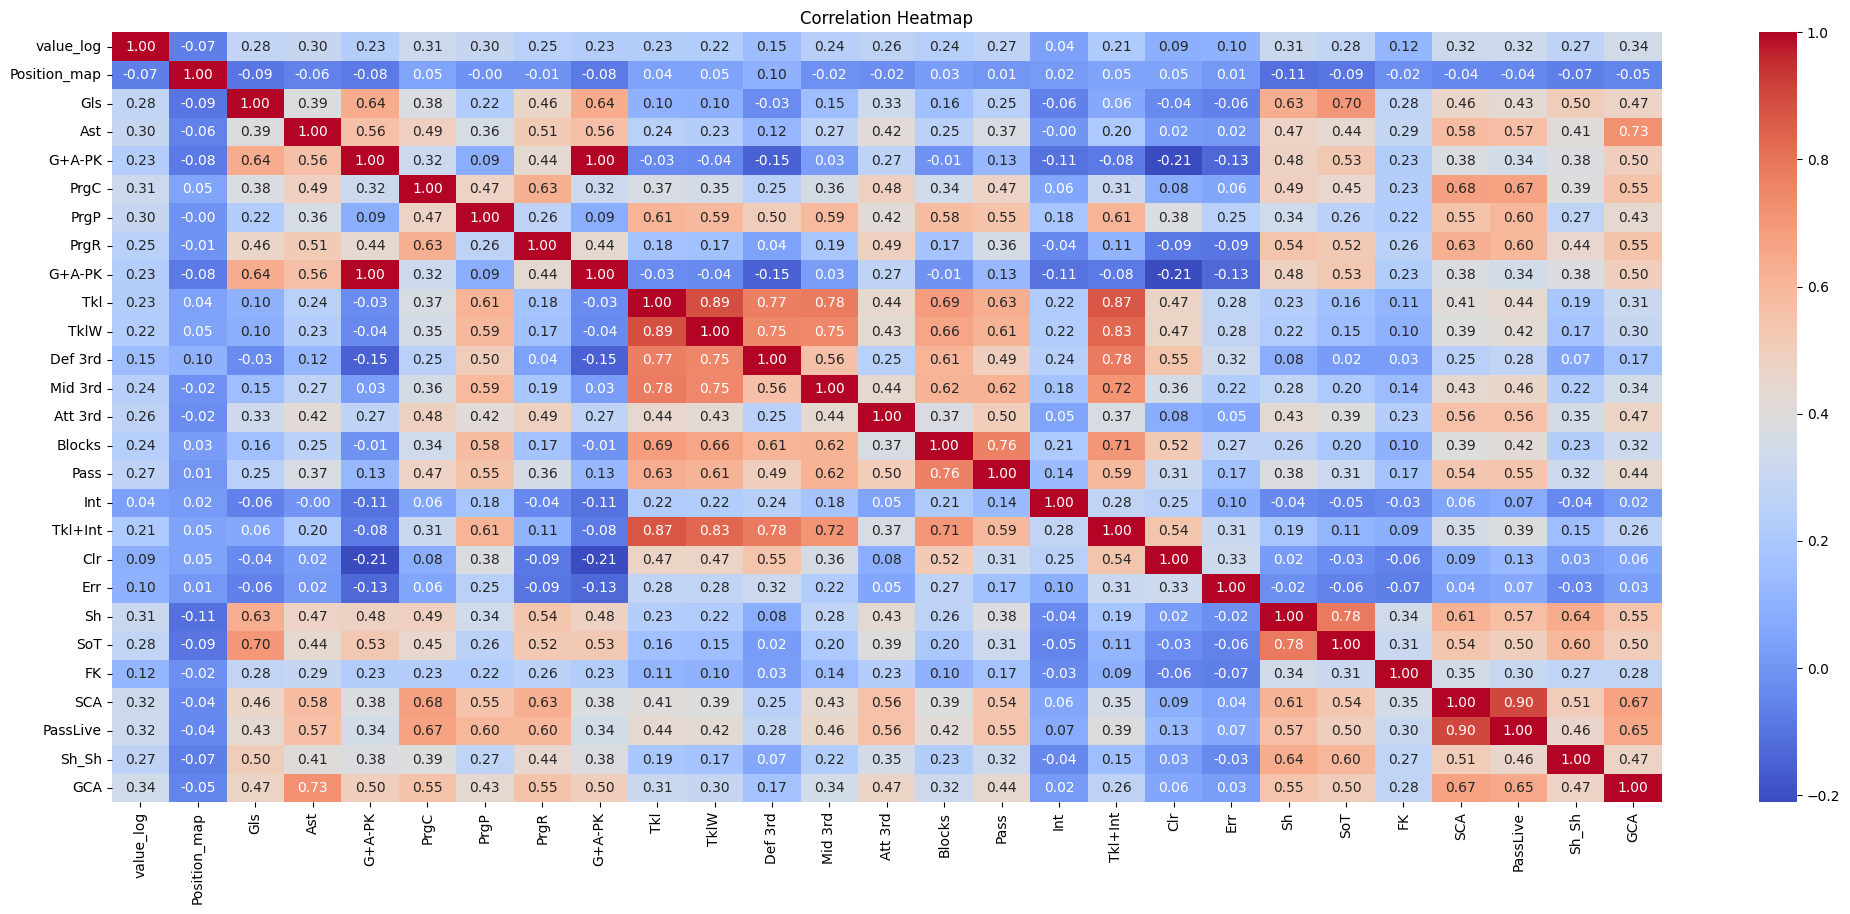

In [11]:
discrete_variables = ['value_log','Position_map','Gls','Ast','G+A-PK','PrgC','PrgP','PrgR','G+A-PK','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Blocks','Pass','Int','Tkl+Int','Clr','Err','Sh','SoT','FK','SCA','PassLive','Sh_Sh','GCA']
generalStats_pos_discrete = generalStats_pos[discrete_variables]
generalStats_pos_discrete_corr =generalStats_pos_discrete.corr("kendall")
plt.figure(figsize=(25, 10))
sns.heatmap(generalStats_pos_discrete_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Correlation between discrete variables and Value of a football player

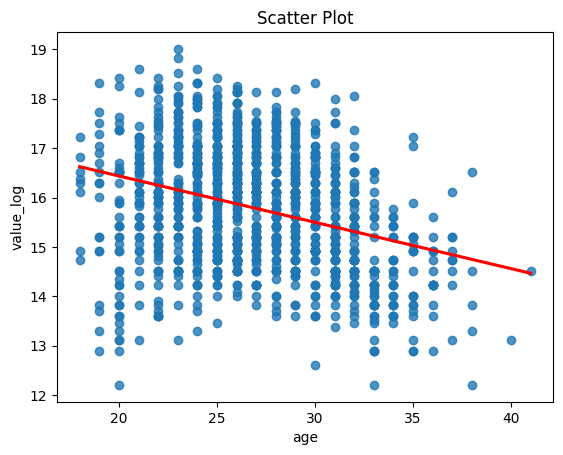

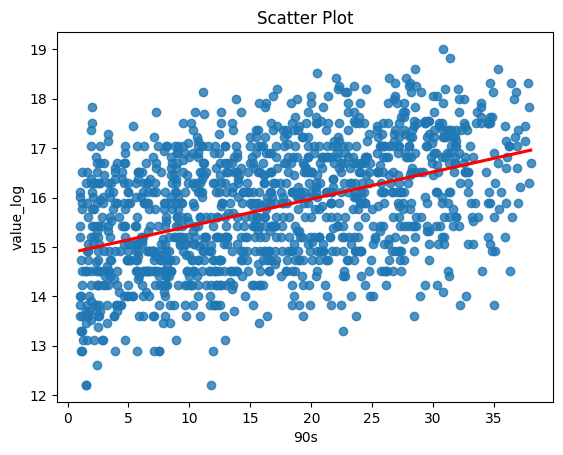

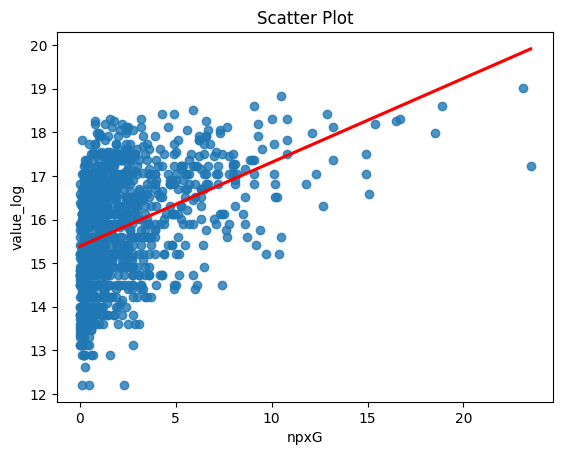

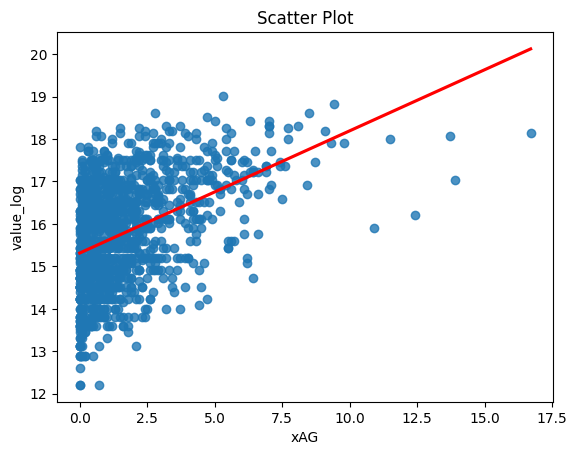

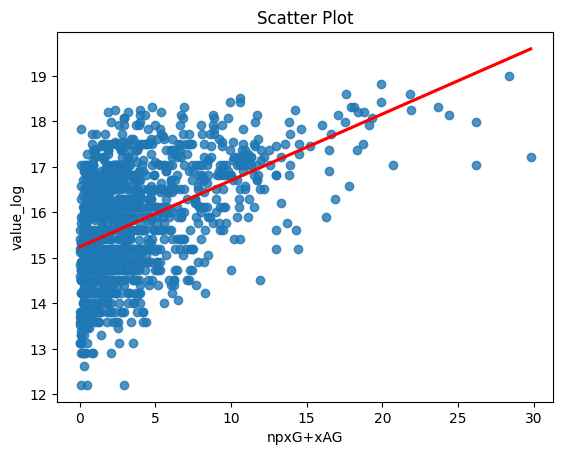

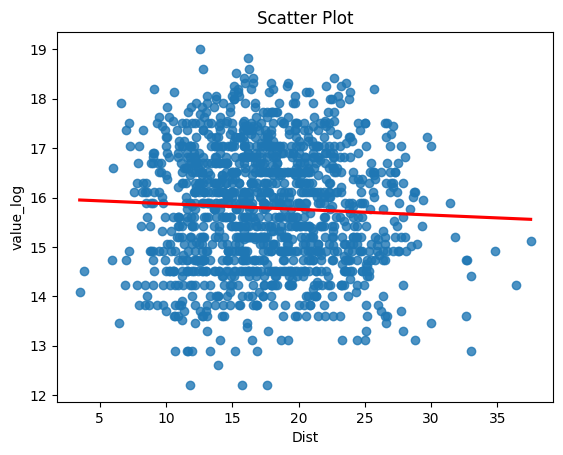

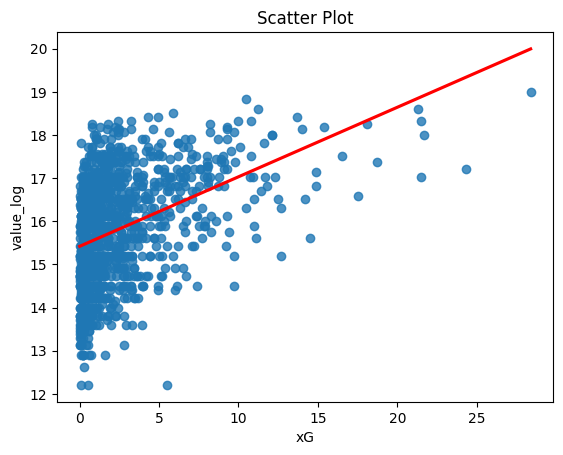

In [12]:
continous_variables = ['age','90s','npxG','xAG','npxG+xAG','Dist','xG']
for variable in continous_variables:
    sns.regplot(x=generalStats_pos[variable], y=generalStats_pos['value_log'], ci=None, line_kws={'color':'red'})
    plt.xlabel(variable)
    plt.ylabel('value_log')
    plt.title('Scatter Plot')
    plt.show()

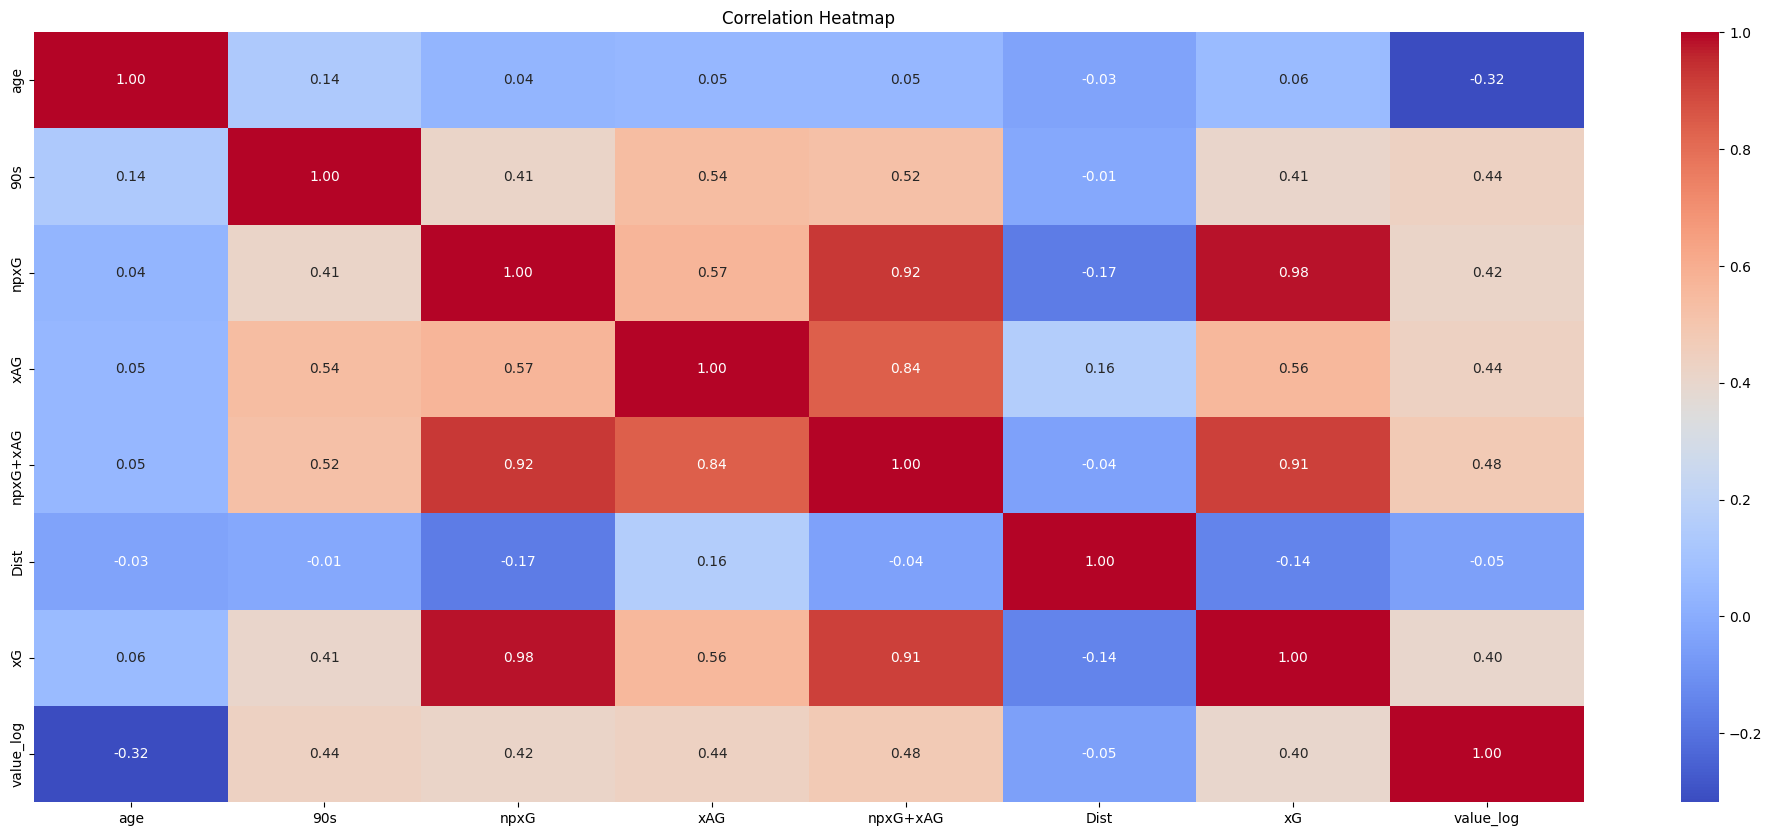

In [13]:
continous_variables = ['age','90s','npxG','xAG','npxG+xAG','Dist','xG','value_log']
generalStats_pos_continous = generalStats_pos[continous_variables]
generalStats_pos_continous_corr =generalStats_pos_continous.corr("pearson")
plt.figure(figsize=(25, 10))
sns.heatmap(generalStats_pos_continous_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The same for goalkeepers

In [14]:
goalkeepingStats_pos = pd.read_csv('/kaggle/input/full-players-dataset/generalStats_pos - goalkeepingStats_pos.csv')
goalkeepingStats_pos['value_log'] = goalkeepingStats_pos['value'].apply(lambda x: math.log(x))
goalkeepingStats_pos = goalkeepingStats_pos.dropna()

Discrete daqt

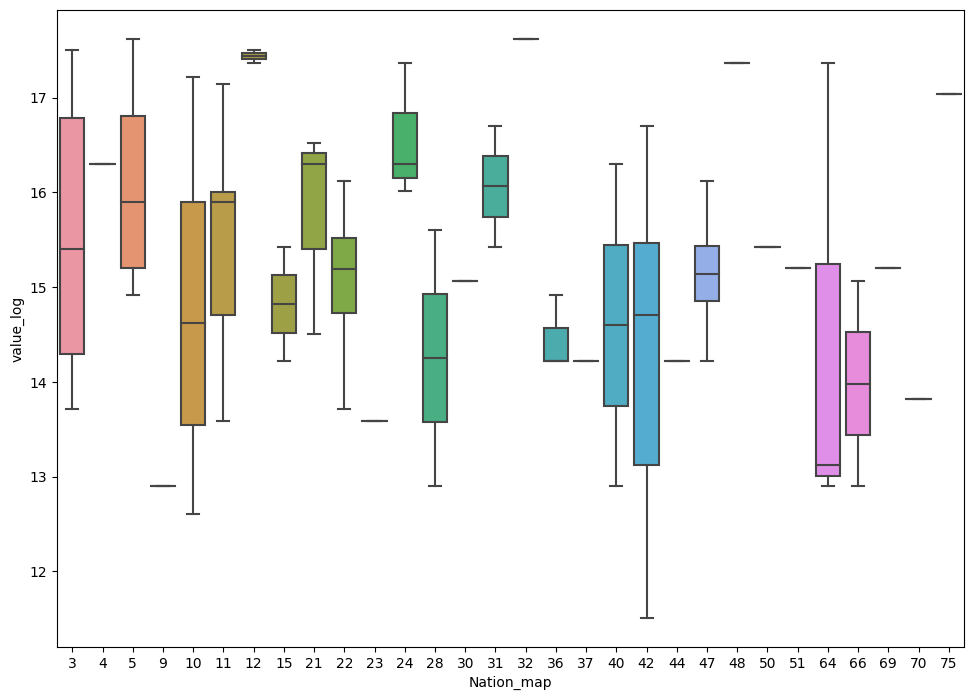

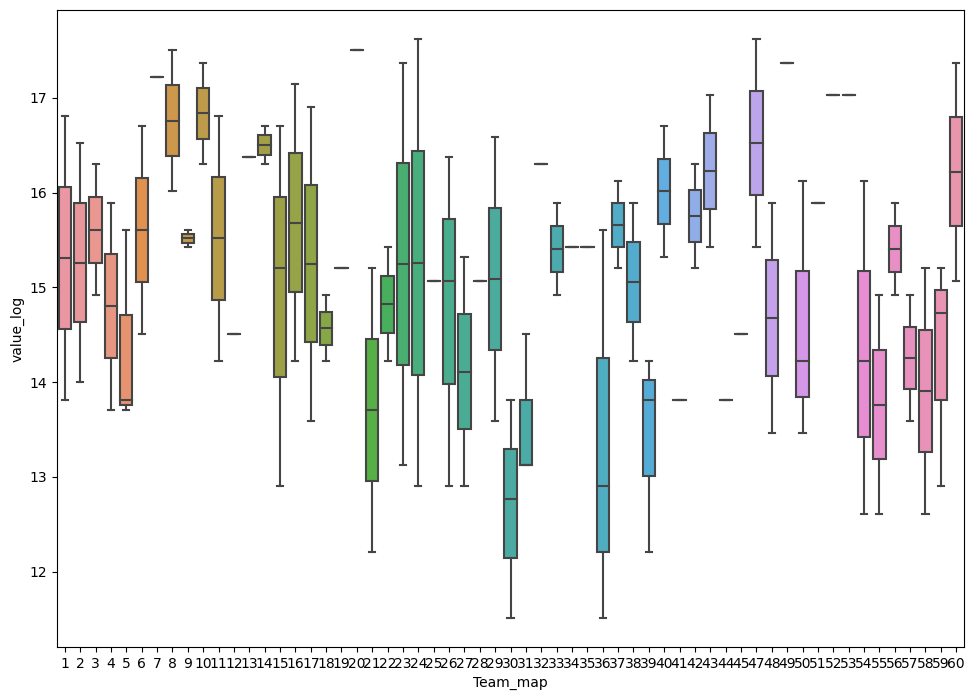

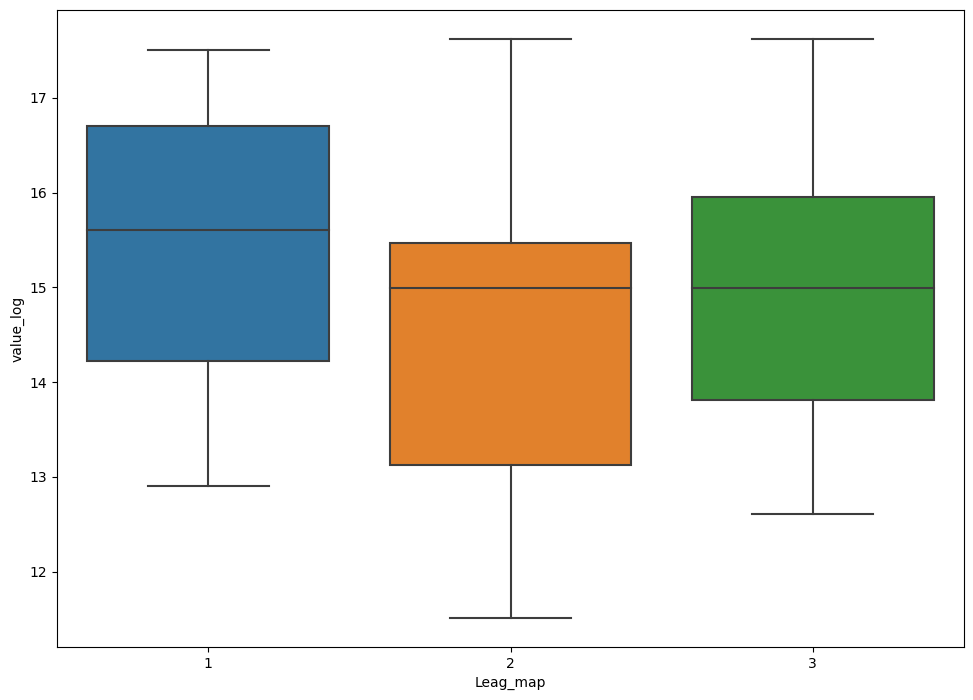

In [15]:
categorical_variables = ['Nation_map','Team_map','Leag_map']

for variable in categorical_variables:
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot(y= "value_log", x=variable, data = goalkeepingStats_pos,ax=ax)
    plt.show()


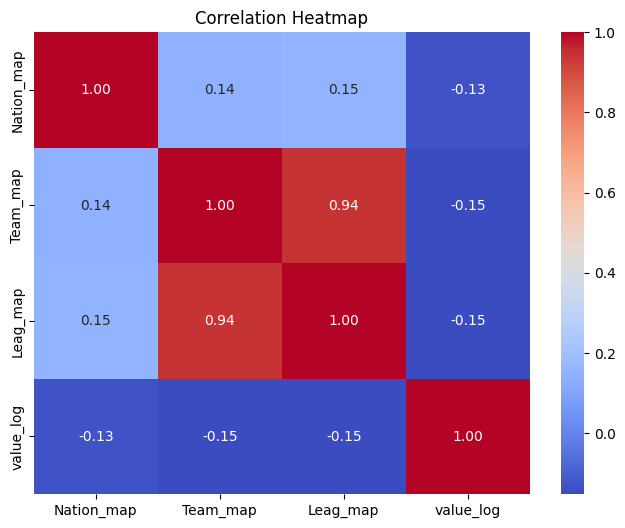

In [16]:
categorical_variables = ['Nation_map','Team_map','Leag_map','value_log']
categorical_data_value = goalkeepingStats_pos[categorical_variables]
categorical_data_value_corr =categorical_data_value.corr("spearman")
plt.figure(figsize=(8, 6))
sns.heatmap(categorical_data_value_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Disrete variables

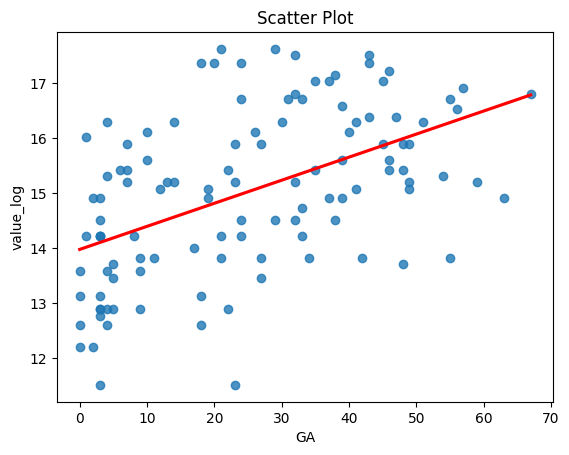

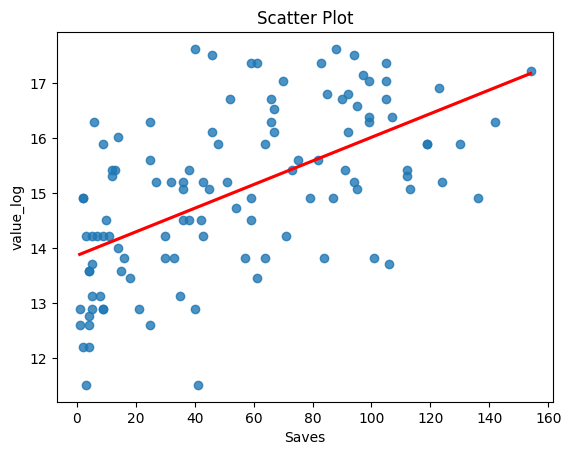

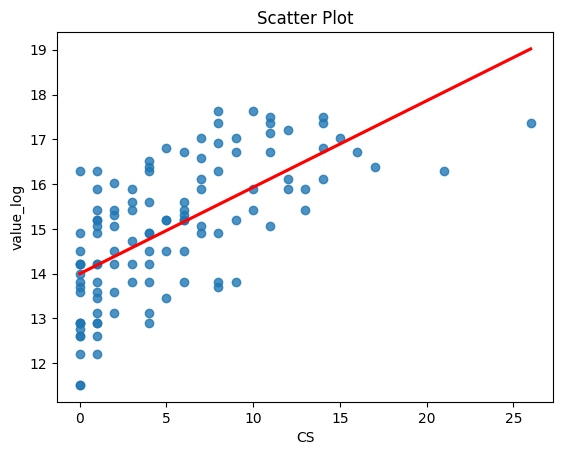

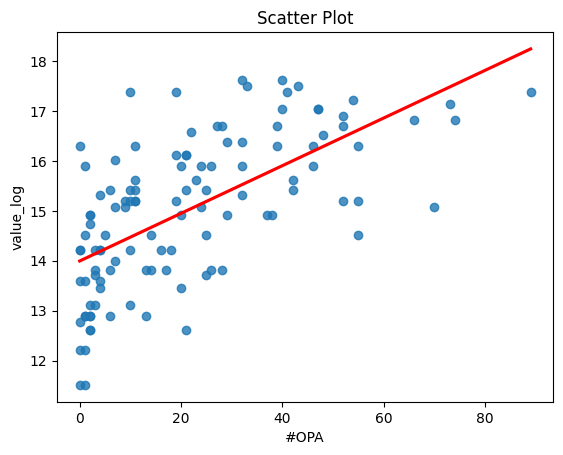

In [17]:
discrete_variables = ['GA','Saves','CS','#OPA']
for variable in discrete_variables:
    sns.regplot(x=goalkeepingStats_pos[variable], y=goalkeepingStats_pos['value_log'], ci=None, line_kws={'color':'red'})
    plt.xlabel(variable)
    plt.ylabel('value_log')
    plt.title('Scatter Plot')
    plt.show()

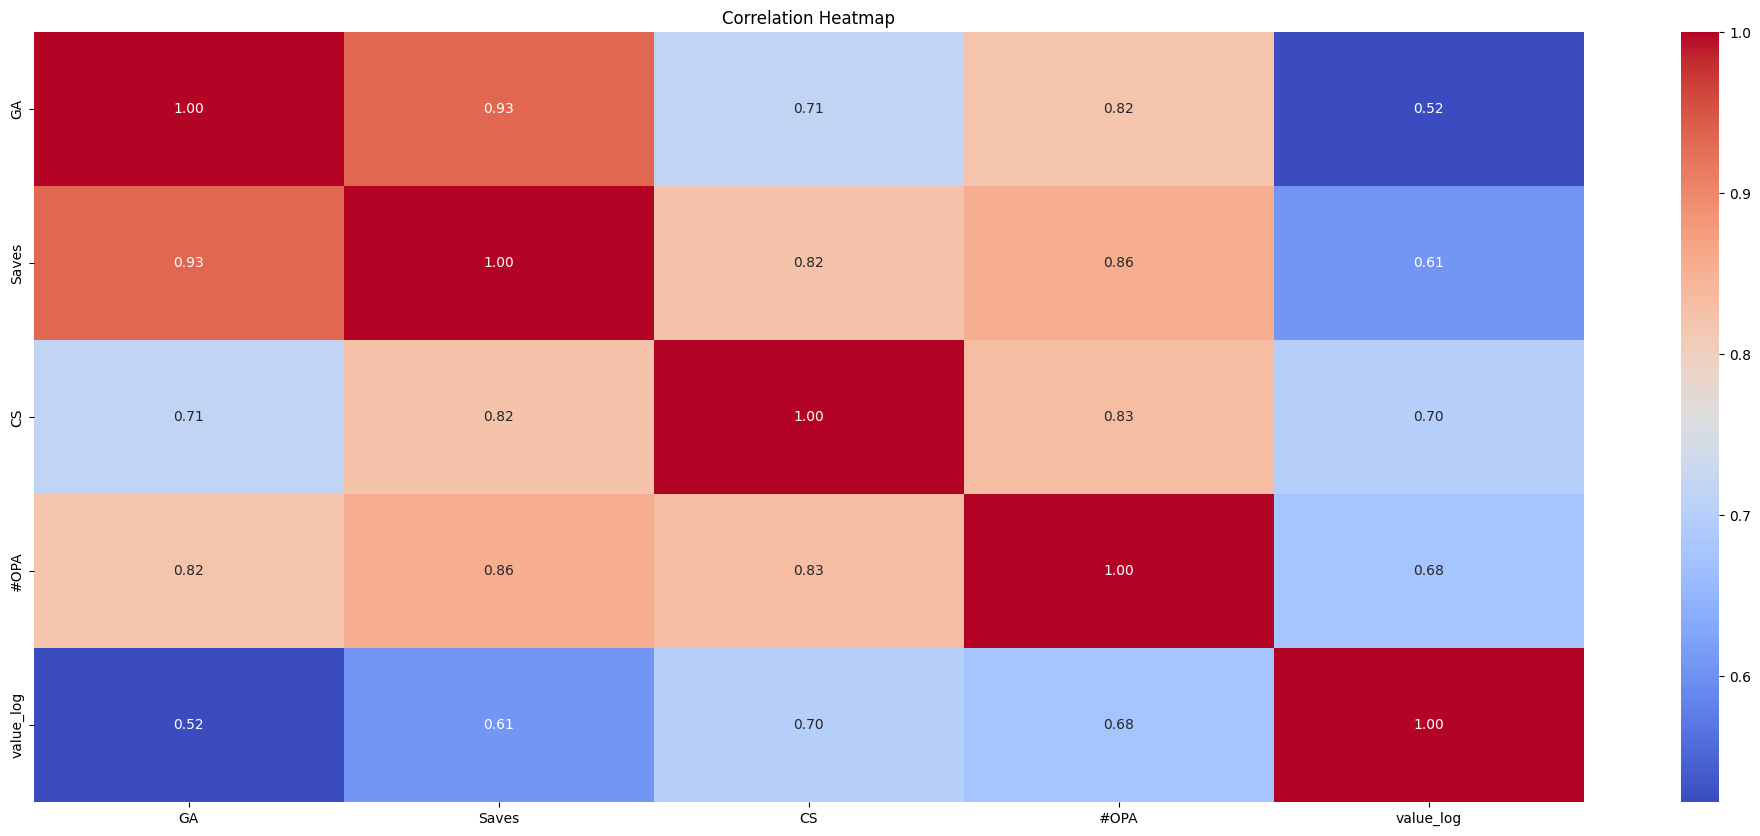

In [18]:
discrete_variables = ['GA','Saves','CS','#OPA','value_log']
goalkeepingStats_pos_discrete = goalkeepingStats_pos[discrete_variables]
goalkeepingStats_pos_discrete_corr =goalkeepingStats_pos_discrete.corr("spearman")
plt.figure(figsize=(25, 10))
sns.heatmap(goalkeepingStats_pos_discrete_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Continous variables

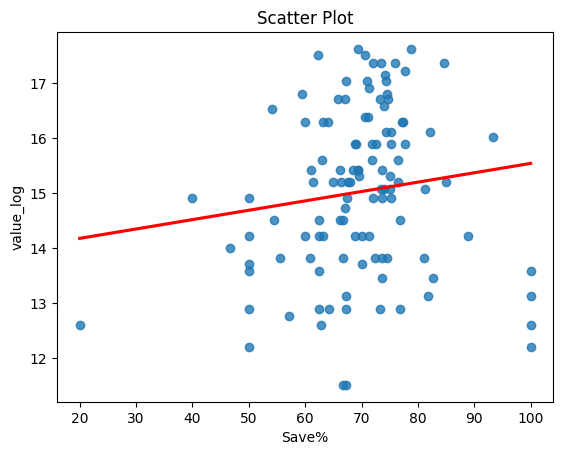

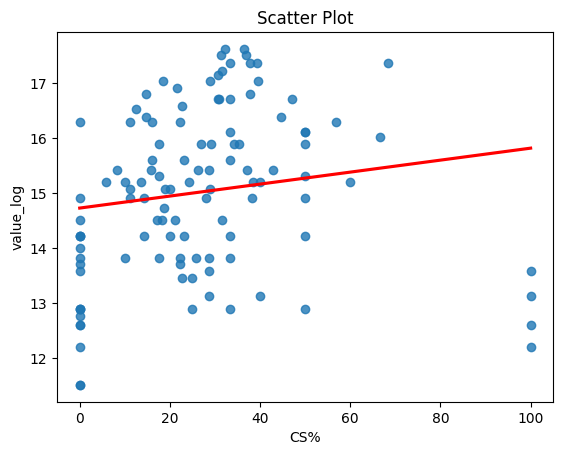

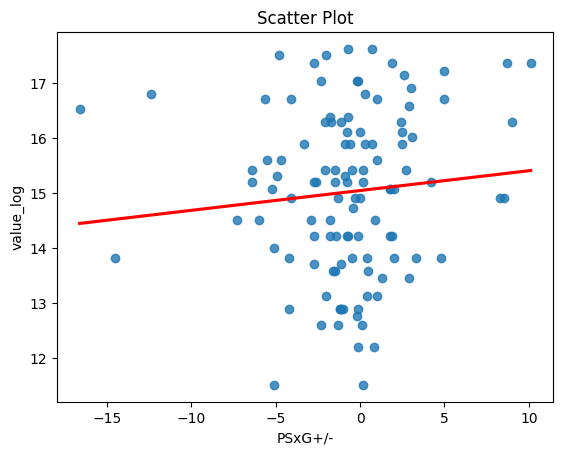

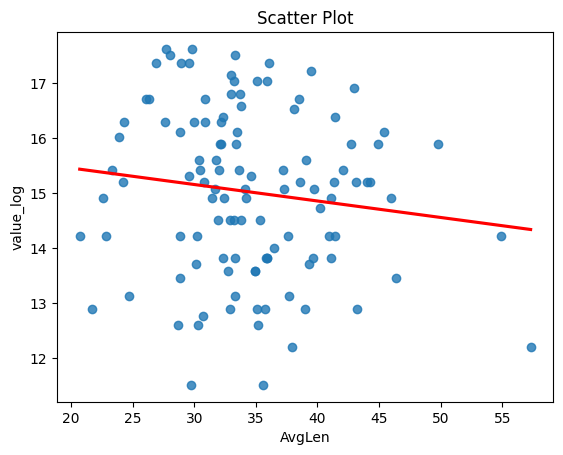

In [19]:
continous_variables = ['Save%','CS%','PSxG+/-','AvgLen']
for variable in continous_variables:
    sns.regplot(x=goalkeepingStats_pos[variable], y=goalkeepingStats_pos['value_log'], ci=None, line_kws={'color':'red'})
    plt.xlabel(variable)
    plt.ylabel('value_log')
    plt.title('Scatter Plot')
    plt.show()

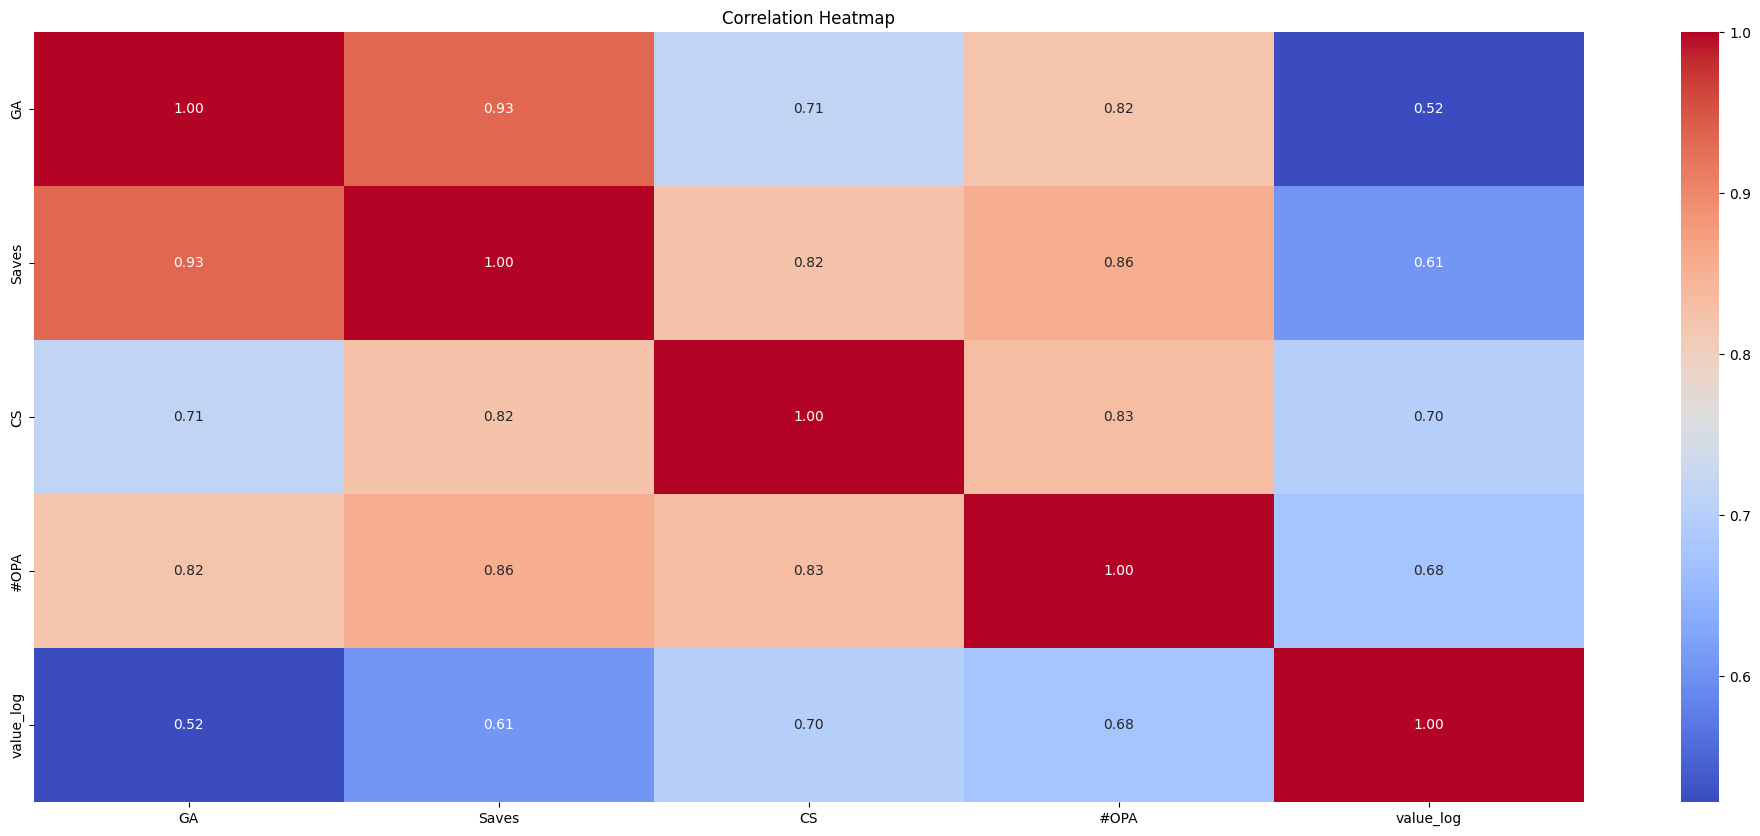

In [20]:
continous_variables = ['Save%','CS%','PSxG+/-','AvgLen','value_log']
goalkeepingStats_pos_continous = goalkeepingStats_pos[continous_variables]
goalkeepingStats_pos_continous_corr =goalkeepingStats_pos_continous.corr("kendall")
plt.figure(figsize=(25, 10))
sns.heatmap(goalkeepingStats_pos_discrete_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Feature selection - PCA

In [21]:
X = generalStats_pos.iloc[:, 3:-2]

X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean)/X_std
print(Z)

           age  Nation_map        DF        FW        MF  Position_map  \
0    -0.935175   -0.795532 -0.861531  1.318491 -0.958099     -1.575647   
1    -0.935175   -0.524773 -0.861531  1.318491 -0.958099     -1.575647   
2    -1.413653   -1.012140 -0.861531  1.318491 -0.958099     -1.575647   
3    -0.695935   -0.254013 -0.861531  1.318491 -0.958099     -1.575647   
4    -0.935175   -1.012140 -0.861531  1.318491 -0.958099     -1.575647   
...        ...         ...       ...       ...       ...           ...   
1310 -1.652893   -0.633076 -0.861531 -0.757847  1.042914     -0.713002   
1311  0.739501    1.966218  1.159814 -0.757847 -0.958099      0.149642   
1314  2.653417    1.099786 -0.861531  1.318491 -0.958099     -1.575647   
1315  1.457220    1.099786  1.159814 -0.757847 -0.958099      0.149642   
1316 -1.652893   -0.633076 -0.861531  1.318491  1.042914      1.012287   

      Team_map  Leag_map       90s       Gls  ...        Sh       SoT  \
0    -1.286700 -1.217405  1.437565  9.

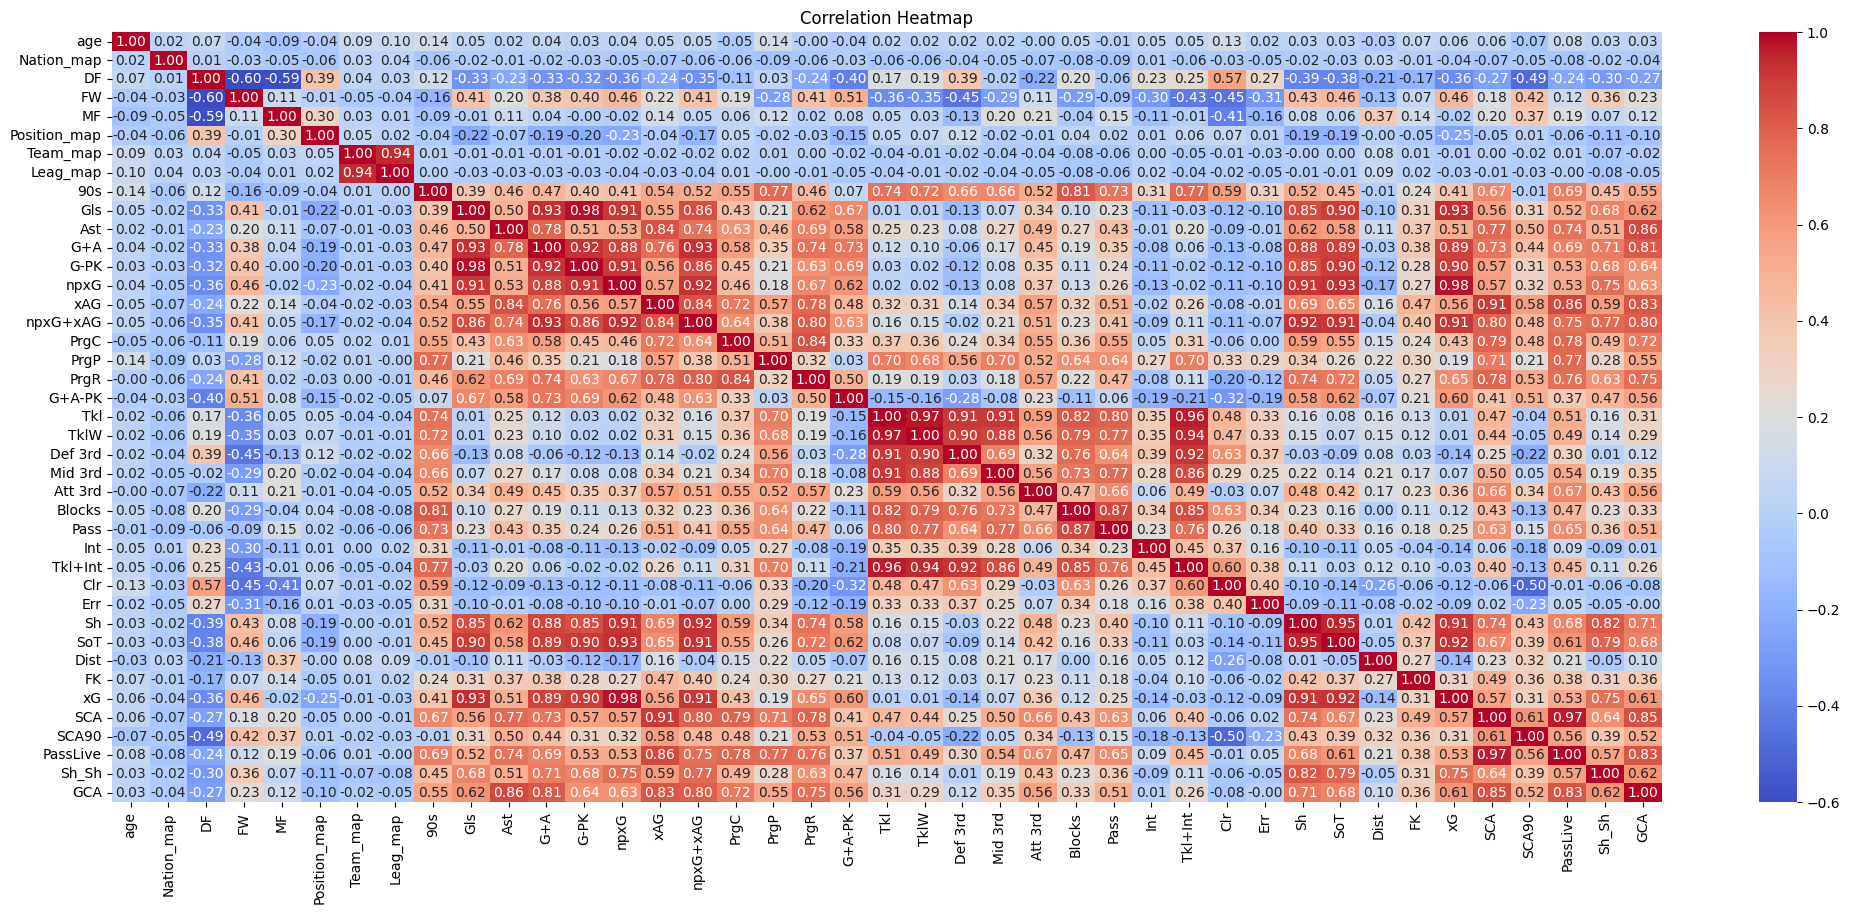

In [22]:
c = Z.cov()
plt.figure(figsize=(25, 10))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


In [23]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [ 1.49973867e+01  8.26548575e+00  2.99078422e+00  2.02109607e+00
  1.50343387e+00  1.28662340e+00  1.05698199e+00  9.37433812e-01
  9.82729188e-01  8.39254097e-01  7.96729946e-01  6.64432985e-01
  6.45376241e-01  5.71079645e-01  4.68351347e-01  4.33220165e-01
  3.76260114e-01  3.31744111e-01  2.95769755e-01  2.49230135e-01
  2.28779457e-01  1.60654080e-01  1.51394686e-01  1.34834335e-01
  9.66993750e-02  9.12818861e-02  8.19063575e-02  5.91147548e-02
  5.51156433e-02  4.32442331e-02  3.85860042e-02  3.56539201e-02
  3.34533335e-02  2.94642896e-02  2.36400902e-02  1.55040142e-02
  5.79436134e-03  1.39114594e-03  8.45288338e-05 -1.23685567e-15
 -1.16082853e-16]
Eigen values Shape: (41,)
Eigen Vector Shape: (41, 41)


In [24]:
idx = eigenvalues.argsort()[::-1]
 
# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]
 
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]
print(eigenvectors)
print(eigenvalues)

[[-1.16836333e-02  2.01829564e-02  8.29737828e-02 ... -1.91253162e-04
  -2.52790043e-16  7.44039113e-16]
 [ 1.81615039e-02 -1.64981082e-02  1.50346242e-02 ... -1.29684579e-04
  -9.54466683e-17 -9.05915239e-16]
 [ 8.29880971e-02  1.68799405e-01  2.45328427e-01 ... -3.51525718e-04
  -1.06186971e-14  1.85197284e-14]
 ...
 [-2.30531267e-01  6.10627393e-02 -1.35328771e-01 ... -1.36964764e-03
  -6.63208020e-15 -1.70577555e-14]
 [-1.96713876e-01 -7.30270906e-02  9.04922378e-02 ... -6.84000625e-04
  -1.16184817e-15 -5.21649628e-16]
 [-2.26396720e-01 -1.67755790e-02 -6.02471891e-02 ...  7.06015382e-04
  -1.50191160e-18 -3.06737103e-15]]
[ 1.49973867e+01  8.26548575e+00  2.99078422e+00  2.02109607e+00
  1.50343387e+00  1.28662340e+00  1.05698199e+00  9.82729188e-01
  9.37433812e-01  8.39254097e-01  7.96729946e-01  6.64432985e-01
  6.45376241e-01  5.71079645e-01  4.68351347e-01  4.33220165e-01
  3.76260114e-01  3.31744111e-01  2.95769755e-01  2.49230135e-01
  2.28779457e-01  1.60654080e-01  1.513

In [25]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.36578992, 0.56738713, 0.64033309, 0.68962811, 0.72629723,
       0.75767829, 0.78345834, 0.80742735, 0.83029158, 0.8507612 ,
       0.87019363, 0.88639932, 0.9021402 , 0.91606897, 0.92749218,
       0.93805852, 0.9472356 , 0.95532692, 0.96254081, 0.9686196 ,
       0.97419958, 0.97811798, 0.98181053, 0.98509917, 0.98745769,
       0.98968408, 0.9916818 , 0.99312362, 0.9944679 , 0.99552264,
       0.99646376, 0.99733337, 0.99814931, 0.99886795, 0.99944454,
       0.99982268, 0.99996401, 0.99999794, 1.        , 1.        ,
       1.        ])

In [26]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components


2

                   PC1       PC2
age          -0.011684  0.020183
Nation_map    0.018162 -0.016498
DF            0.082988  0.168799
FW           -0.074912 -0.225266
MF           -0.033139 -0.031159
Position_map  0.033818  0.055103
Team_map      0.007036 -0.005744
Leag_map      0.010749 -0.004230
90s          -0.180833  0.200959
Gls          -0.200456 -0.136867
Ast          -0.203237 -0.023442
G+A          -0.230372 -0.108243
G-PK         -0.201814 -0.133274
npxG         -0.205895 -0.136926
xAG          -0.223524 -0.006768
npxG+xAG     -0.239673 -0.093615
PrgC         -0.195599  0.030895
PrgP         -0.156175  0.200193
PrgR         -0.213255 -0.062252
G+A-PK       -0.146482 -0.179058
Tkl          -0.114016  0.294301
TklW         -0.108919  0.290962
Def 3rd      -0.057258  0.307846
Mid 3rd      -0.121703  0.247944
Att 3rd      -0.174709  0.091305
Blocks       -0.118809  0.264646
Pass         -0.166129  0.202246
Int          -0.006040  0.165592
Tkl+Int      -0.096867  0.310881
Clr       

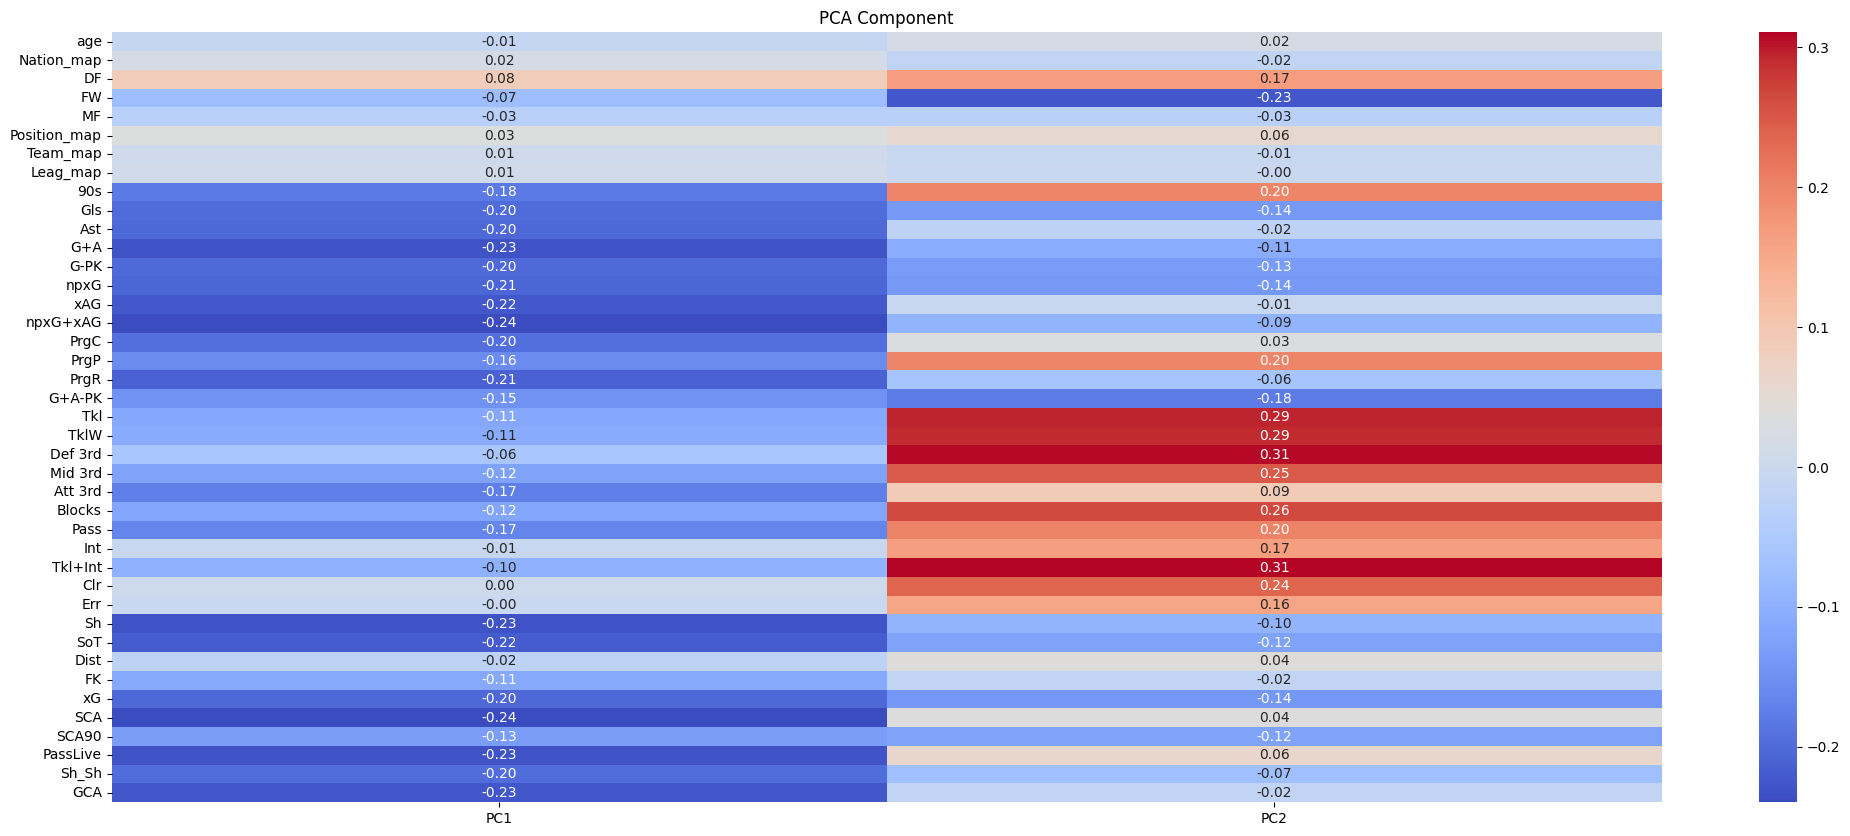

In [27]:
u = eigenvectors[:,:n_components]
column_names = generalStats_pos.columns.tolist()
pca_component = pd.DataFrame(u,
                             index = column_names[3:-2],
                             columns = ['PC1','PC2']
                            )
 
# plotting heatmap
print(pca_component)
plt.figure(figsize=(25, 10))
sns.heatmap(pca_component, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.title('PCA Component')
plt.show()

In [28]:
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

           PCA1       PCA2
0    -16.301573 -10.986045
1    -14.513789  -3.808405
2    -17.143849  -1.214326
3    -13.031751  -9.060222
4     -7.839748  -3.918086
...         ...        ...
1310   4.506826  -2.323112
1311   5.079295  -1.497786
1314   0.013159  -3.959026
1315   5.219787  -1.640789
1316   4.516169  -2.464883

[1274 rows x 2 columns]


In [29]:
#for i in range(3,len(column_names[3:-2])):
 #   print(column_names[i], pca_component[i-3])
    
print(pca_component)

                   PC1       PC2
age          -0.011684  0.020183
Nation_map    0.018162 -0.016498
DF            0.082988  0.168799
FW           -0.074912 -0.225266
MF           -0.033139 -0.031159
Position_map  0.033818  0.055103
Team_map      0.007036 -0.005744
Leag_map      0.010749 -0.004230
90s          -0.180833  0.200959
Gls          -0.200456 -0.136867
Ast          -0.203237 -0.023442
G+A          -0.230372 -0.108243
G-PK         -0.201814 -0.133274
npxG         -0.205895 -0.136926
xAG          -0.223524 -0.006768
npxG+xAG     -0.239673 -0.093615
PrgC         -0.195599  0.030895
PrgP         -0.156175  0.200193
PrgR         -0.213255 -0.062252
G+A-PK       -0.146482 -0.179058
Tkl          -0.114016  0.294301
TklW         -0.108919  0.290962
Def 3rd      -0.057258  0.307846
Mid 3rd      -0.121703  0.247944
Att 3rd      -0.174709  0.091305
Blocks       -0.118809  0.264646
Pass         -0.166129  0.202246
Int          -0.006040  0.165592
Tkl+Int      -0.096867  0.310881
Clr       

In [30]:
model_set = pd.concat([Z_pca,generalStats_pos['value_log'],generalStats_pos['id']],axis = 1 )
print(model_set)

           PCA1       PCA2  value_log                   id
0    -16.301573 -10.986045  19.008467    erling_haaland_23
1    -14.513789  -3.808405  18.826146   vinicius_junior_23
2    -17.143849  -1.214326  18.603002       bukayo_saka_21
3    -13.031751  -9.060222  18.603002    victor_osimhen_24
4     -7.839748  -3.918086  18.515991        phil_foden_23
...         ...        ...        ...                  ...
1310   4.506826  -2.323112  12.899220       oscar_urena_20
1311   5.079295  -1.497786  12.611538  marios_oikonomou_30
1314   0.013159  -3.959026  12.206073    daniel_ciofani_38
1315   5.219787  -1.640789  12.206073      luca_marrone_33
1316   4.516169  -2.464883  12.206073     ricard_artero_20

[1274 rows x 4 columns]


In [31]:
# Assuming df is your DataFrame
model_set_1 = model_set.iloc[:,0:int(len(model_set['id'])/2)]

X = model_set_1[['PCA1', 'PCA2']]  # Features
y = model_set_1['value_log']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(y_pred)

Mean Squared Error: 1.8992774087867983
[17.62217305 17.82284374 17.03438638 16.70588232 14.50865774 15.8949521
 14.22097567 15.31958795 17.03438638 18.31532023 14.91412285 16.21340583
 16.30041721 14.73180129 16.52356076 15.42494847 14.73180129 14.73180129
 15.8949521  13.59236701 18.31532023 17.50439001 17.50439001 15.20180492
 14.50865774 14.91412285 14.40329722 15.31958795 13.99783211 16.11809565
 15.20180492 14.73180129 14.91412285 16.58809928 14.50865774 17.50439001
 13.59236701 16.30041721 14.22097567 14.91412285 15.42494847 15.60727003
 17.98989783 16.38045992 18.31532023 14.50865774 15.8949521  14.73180129
 16.21340583 16.30041721 16.90655301 17.37085862 15.20180492 16.81124283
 17.37085862 15.8949521  14.40329722 18.42068074 14.22097567 15.03928599
 17.50439001 15.42494847 15.20180492 16.70588232 14.50865774 13.45883561
 14.22097567 15.42494847 16.21340583 16.30041721 17.50439001 14.91412285
 17.37085862 16.52356076 16.52356076 16.30041721 17.50439001 17.55318018
 14.91412285 

In [32]:
player_data = model_set[model_set['id'] == 'ricard_artero_20']
columns_to_remove = ['id', 'value_log']
player_data = player_data.drop(columns = columns_to_remove)
# Make the prediction
predicted_log_value = tree_model.predict(player_data)


# Reverse the log transformation
predicted_value = np.exp(predicted_log_value)

print(f'Predicted Value: {predicted_value[0]}')

Predicted Value: 1199999.9999999998


In [33]:
X = generalStats_pos.iloc[:, 3:-2]
y = generalStats_pos.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

estimator = RandomForestRegressor()
selector = RFECV(estimator, cv=5)
selector = selector.fit(X_train, y_train)

print("Suggested number of features: %d" % selector.n_features_)
print("Selected features: %s" % selector.support_)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

Suggested number of features: 7
Selected features: [ True False False False False False  True False  True False False  True
 False False False  True False  True False False False False False False
 False False False False False False False False False False False False
 False False  True False False]


In [34]:
model = RandomForestRegressor()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
y_train_pred = model.predict(X_train_selected)

In [35]:
# Evaluate the model performance using various metrics
print("Test")
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Print the metrics and interpretation
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared: {:.2%}".format(r_squared))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Explained Variance Score (EVS): {:.2%}".format(evs))

print("train")
mse = mean_squared_error(y_train_pred,y_train)
r_squared = r2_score(y_train_pred,y_train)
mae = mean_absolute_error(y_train_pred,y_train)
evs = explained_variance_score(y_train_pred,y_train)

# Print the metrics and interpretation
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared: {:.2%}".format(r_squared))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Explained Variance Score (EVS): {:.2%}".format(evs))

Test
Mean Squared Error (MSE): 0.49
R-squared: 67.73%
Mean Absolute Error (MAE): 0.55
Explained Variance Score (EVS): 67.74%
train
Mean Squared Error (MSE): 0.08
R-squared: 93.69%
Mean Absolute Error (MAE): 0.21
Explained Variance Score (EVS): 93.69%


In [36]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = RandomForestRegressor()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train_selected,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [37]:
model = gcv.best_estimator_
model.fit(X_train_selected,y_train)
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

In [38]:
# Evaluate the model performance using various metrics
print("Test")
mse = mean_squared_error(y_test_pred, y_pred)
r_squared = r2_score(y_test_pred, y_pred)
mae = mean_absolute_error(y_test_pred, y_pred)
evs = explained_variance_score(y_test_pred, y_pred)

# Print the metrics and interpretation
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared: {:.2%}".format(r_squared))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Explained Variance Score (EVS): {:.2%}".format(evs))

print("train")
mse = mean_squared_error(y_train_pred,y_train)
r_squared = r2_score(y_train_pred,y_train)
mae = mean_absolute_error(y_train_pred,y_train)
evs = explained_variance_score(y_train_pred,y_train)

# Print the metrics and interpretation
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared: {:.2%}".format(r_squared))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Explained Variance Score (EVS): {:.2%}".format(evs))

Test
Mean Squared Error (MSE): 0.02
R-squared: 98.15%
Mean Absolute Error (MAE): 0.10
Explained Variance Score (EVS): 98.15%
train
Mean Squared Error (MSE): 0.22
R-squared: 78.88%
Mean Absolute Error (MAE): 0.37
Explained Variance Score (EVS): 78.88%


In [ ]:
el = generalStats